In [13]:
library(mgcv)#linear regression
library(psych)
library(ggplot2)
library(corrplot)# correlation plot
library(RColorBrewer) # color
library(WVPlots)
library(reshape2)
library(lars)
library(MASS)
library(glmnet)# Lasso, ridge regression
library(dplyr) # %>%
library(data.table) #fread
library(gridExtra) # Combine different plots
library(ridge) # ridge regression

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Warning message:
"package 'WVPlots' was built under R version 3.6.3"
Loading required package: wrapr

Warning message:
"package 'wrapr' was built under R version 3.6.3"

Attaching package: 'wrapr'


The following object is masked from 'package:mgcv':

    %.%


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Loaded lars 1.2



Attaching package: 'lars'


The following object is masked from 'package:psych':

    error.bars


Warning message:
"package 'MASS' was built under R version 3.6.3"
Warning message:
"package 'glmnet' was built under R ve

In [21]:
mycolor = brewer.pal(9, "Set1")

# input aggregration data

In [1]:
df = read.csv("../../data/tidy/system-model-19-04.csv")

In [2]:
head(df)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,NA,5,1,0,635.93286,49.687778,11.009444,11.941666667,5.7761111,...,8.915278,5.542500000,2.51111111,1.6769444,17.75445,12.798577,NA,NA,NA,NA
2,2,NA,5,1,1,184.15559,20.515000,11.290833,1.434722222,0.9836111,...,4.729444,0.870000000,0.37972222,0.7769444,18.90926,8.976631,NA,NA,NA,NA
3,3,NA,5,1,2,49.44448,5.271667,2.803333,0.004444444,0.5230556,...,2.927500,0.001666667,0.03416667,0.4183333,14.49379,9.379287,NA,NA,NA,NA
4,4,2019,4,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1561.0,2,42,40.567
5,5,2019,4,1,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,171.7,2,42,35.110
6,6,2019,4,1,10,1792.54004,244.447500,117.006389,57.090277778,17.1844444,...,56.752222,14.853611111,6.31583333,4.5161111,17.43370,7.333027,19134.9,2,42,53.894


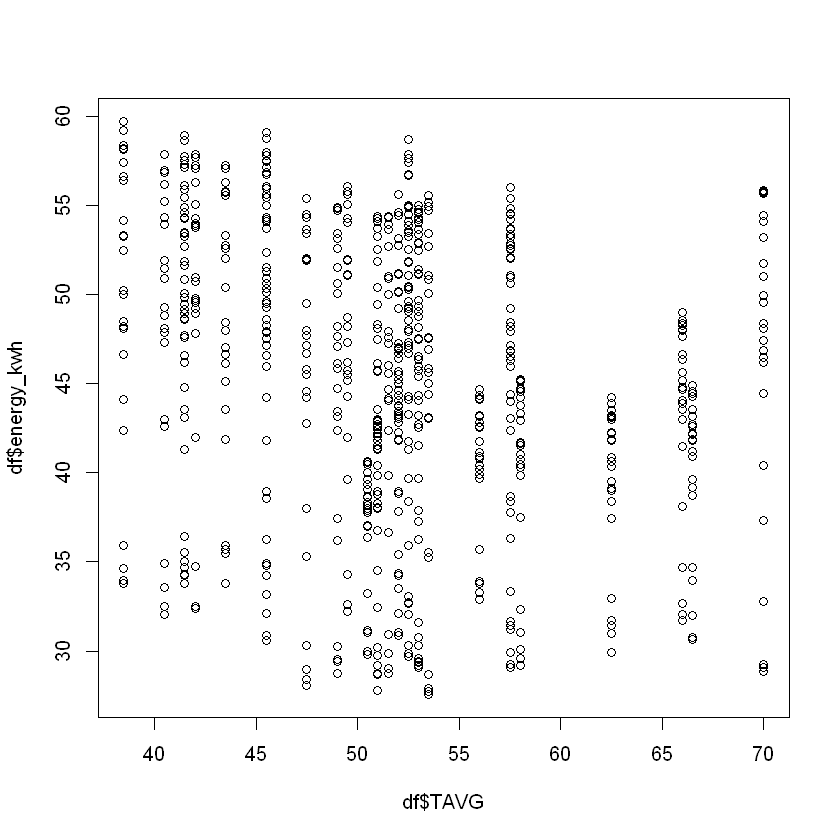

In [16]:
plot(df$TAVG,df$energy_kwh)

In [9]:
log(df$accel_bin_5_time_hr,2)

[1]  1.753982872  1.997954004  1.850000882  1.775909663  1.726953487
  [6]  1.714560260  1.828996262  1.993267183  2.045092511  1.762451398
 [11]           NA  1.710765924  1.599097310  1.520741835  1.649789040
 [16] -0.139329328 -0.461482120  0.862528903  1.406057363  1.549139554
 [21]  1.758985446  1.811535909  0.954845278  0.697108204  1.708869222
 [26]  1.524911545  1.755461953  1.856685264  1.850991505  2.061420015
 [31]  1.888435363  1.882519795  2.004145757  1.741663623  0.832792673
 [36]  1.995053553  1.627195110  1.739231614  1.638009216  0.797825155
 [41]  0.114870342  0.890498642  1.400235691  1.568240848  1.609988451
 [46]  1.753046562  0.974614024  0.678796489  1.769334239  1.584984186
 [51]  1.686363136  1.770039506  1.675345460  1.685477998  1.961767706
 [56]  1.956001588  1.953895203  1.737799824  0.576916956  1.691066750
 [61]  1.582558893  1.592827280  1.694510141  0.828355512 -0.386040785
 [66]  0.819872822  1.284769013  1.588281046  1.640489719  1.612112477
 [71]  0.917257454  0.691597150  1.627741263  1.669334963  1.755487373
 [76]  1.763134621  1.719883473  2.051383013  1.939818663  1.877006401
 [81]  2.016912685  1.875933801  0.547740529  1.691383595  1.671979771
 [86]  1.657353359  1.877393745  0.354055057 -0.098420604  0.947828405
 [91]  1.440484896  1.599273395  1.752626695  1.687231601  0.992086917
 [96]  0.688642252  1.314990154  1.260958690  1.389928630  1.552211785
[101]  1.642241875  1.441345954  1.757876625  1.754607374  1.717027553
[106]  1.543757723  0.483706135  1.675172187  1.675992077  1.382172192
[111]  1.239000390  0.890343382 -0.088250709  0.770606578  1.082406344
[116]  1.070479124  1.283960464  1.268181299  0.829911003  0.591342912
[121]  1.235016137  1.253102322  1.473689675  1.499942789  1.730954901
[126]  1.723642631  1.633291672  1.651243006  1.996645423  1.328872068
[131]  0.413718765  1.870592462  1.241048151  1.185494936  1.182818703
[136]  0.308682960 -0.692385124  0.272550659  1.022485650  1.071216971
[141]  1.283841248  1.118760590  0.865054598  0.537154207  1.867228439
[146]  1.862242391  1.919635864  1.967801397  2.079778995  1.977123814
[151]  2.056587269  1.898324395  1.725196744  1.620613135  1.007415839
[156]  1.775023550  1.512562111  1.766119417  1.729648420  0.694263868
[161]  0.374239029  0.923977588  1.390920395  1.688093385  1.776864558
[166]  1.818433018  0.952792443  0.561896067  1.596682602  1.543022412
[171]  1.718367883  1.495328447  1.763818849  1.803483670  1.794921582
[176]  1.835576083  1.742598585  1.811934163  0.674810128  1.692332744
[181]  1.508005706  1.545190244  1.687580978  0.575444444 -0.077303369
[186]  0.824198174  1.313011375  1.523417660  1.581459757  1.597356904
[191]  0.929276976  0.595924671  1.915707549  1.700131394  1.750604808
[196]  1.633024957  1.703437074  1.666879222  1.942779447  2.000019302
[201]  1.737411326  1.835993380  0.330920831  1.539675385  1.524291521
[206]  1.606963259  1.581734802  0.621407105 -0.386334327  0.939838062
[211]  1.363225351  1.586612307  1.648796255  1.863407133  0.910905900
[216]  0.642354586  1.680217127  1.762157364  1.545176492  1.538957537
[221]  1.838044096  1.829303773  1.870029801  2.037424284  1.715752717
[226]  1.791058744  0.305590190  1.706876549  1.988342152  1.609170341
[231]  2.023814689  0.284242687 -0.363735047  0.941635641  1.375485796
[236]  1.558231758  1.645596913  1.660665248  0.981906655  0.768740847
[241]           NA           NA           NA           NA  0.780757226
[246]  1.359519287  1.436776447  1.623392883  1.632536023  1.561535329
[251]           NA  1.526170496  1.500301288  1.490508612  1.767648447
[256]           NA           NA           NA           NA           NA
[261]           NA           NA  0.880114603  0.635595434  1.687519052
[266]  1.696001857  1.630461776  1.603892822  1.619916133  1.538294391
[271]  1.783534367  1.624760370  1.837728692  1.826362796  0.412227144
[276]  1.555970621  1.543674933  1.629723822  2.029654282  0.369988486
[281] -0.235740821  0.8662

# correlation matrix

In [3]:
df = df [-(1:5),]

In [25]:
df$weekends_weekday = as.factor(df$weekends_weekday)

In [26]:
colnames(df)

[1] "X"                      "year"                   "month"                 
 [4] "day"                    "hour"                   "distance_mile"         
 [7] "time_hr"                "speed_bin_1_time_hr"    "speed_bin_2_time_hr"   
[10] "speed_bin_3_time_hr"    "speed_bin_4_time_hr"    "speed_bin_5_time_hr"   
[13] "speed_bin_6_time_hr"    "speed_bin_7_time_hr"    "speed_bin_8_time_hr"   
[16] "accel_bin_1_time_hr"    "accel_bin_2_time_hr"    "accel_bin_3_time_hr"   
[19] "accel_bin_4_time_hr"    "accel_bin_5_time_hr"    "accel_bin_6_time_hr"   
[22] "accel_bin_7_time_hr"    "accel_bin_8_time_hr"    "avg_interval_speed_mph"
[25] "avg_hour_speed_mph"     "ridership"              "weekends_weekday"      
[28] "TAVG"                   "energy_kwh"

In [33]:
d_plot = df [,-(1:5)]

In [34]:
d_plot_melt = melt(d_plot,"energy_kwh")

Warning message in melt(d_plot, "energy_kwh"):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(d_plot). In the next version, this warning will become an error."


In [42]:
options(repr.plot.width = 50, repr.plot.height = 50)
png("../../figures/Energy-scattered.png",height=9000,width=15000,res=360)
ggplot(d_plot_melt ,aes(x = value,y = energy_kwh)) + 
    geom_point(colour= "red") + 
    facet_wrap(~variable ,ncol = 5 ,scales = "free") +
    labs(title = "Energy vs variables ", x = "Variables", y = "Energy consumption(MWh)")+
theme(strip.text = element_text(size = rel(4)),
          title= element_text(size = 60),
          axis.title.x = element_text(size = 50),
           axis.title.y = element_text(size = 50),
          axis.text.x = element_text(size = 30),
          axis.text.y = element_text(size = 30)，
          panel.spacing = unit(2, "lines"))
dev.off()

Warning message:
"Removed 700 rows containing missing values (geom_point)."


png 
  2

In [15]:
dim(d_plot)

[1] 718  23

In [12]:
colnames(d_plot)

[1] "distance_mile"          "time_hr"                "speed_bin_1_time_hr"   
 [4] "speed_bin_2_time_hr"    "speed_bin_3_time_hr"    "speed_bin_4_time_hr"   
 [7] "speed_bin_5_time_hr"    "speed_bin_6_time_hr"    "speed_bin_7_time_hr"   
[10] "speed_bin_8_time_hr"    "accel_bin_1_time_hr"    "accel_bin_2_time_hr"   
[13] "accel_bin_3_time_hr"    "accel_bin_4_time_hr"    "accel_bin_5_time_hr"   
[16] "accel_bin_6_time_hr"    "accel_bin_7_time_hr"    "accel_bin_8_time_hr"   
[19] "avg_interval_speed_mph" "avg_hour_speed_mph"     "ridership"             
[22] "weekends_weekday"       "TAVG"                   "energy_kwh"

In [14]:
d_plot = d_plot[,-22]

In [16]:
# Remove dummy variables 
df_var_plot = na.omit(d_plot)
matrix = cor(df_var_plot)

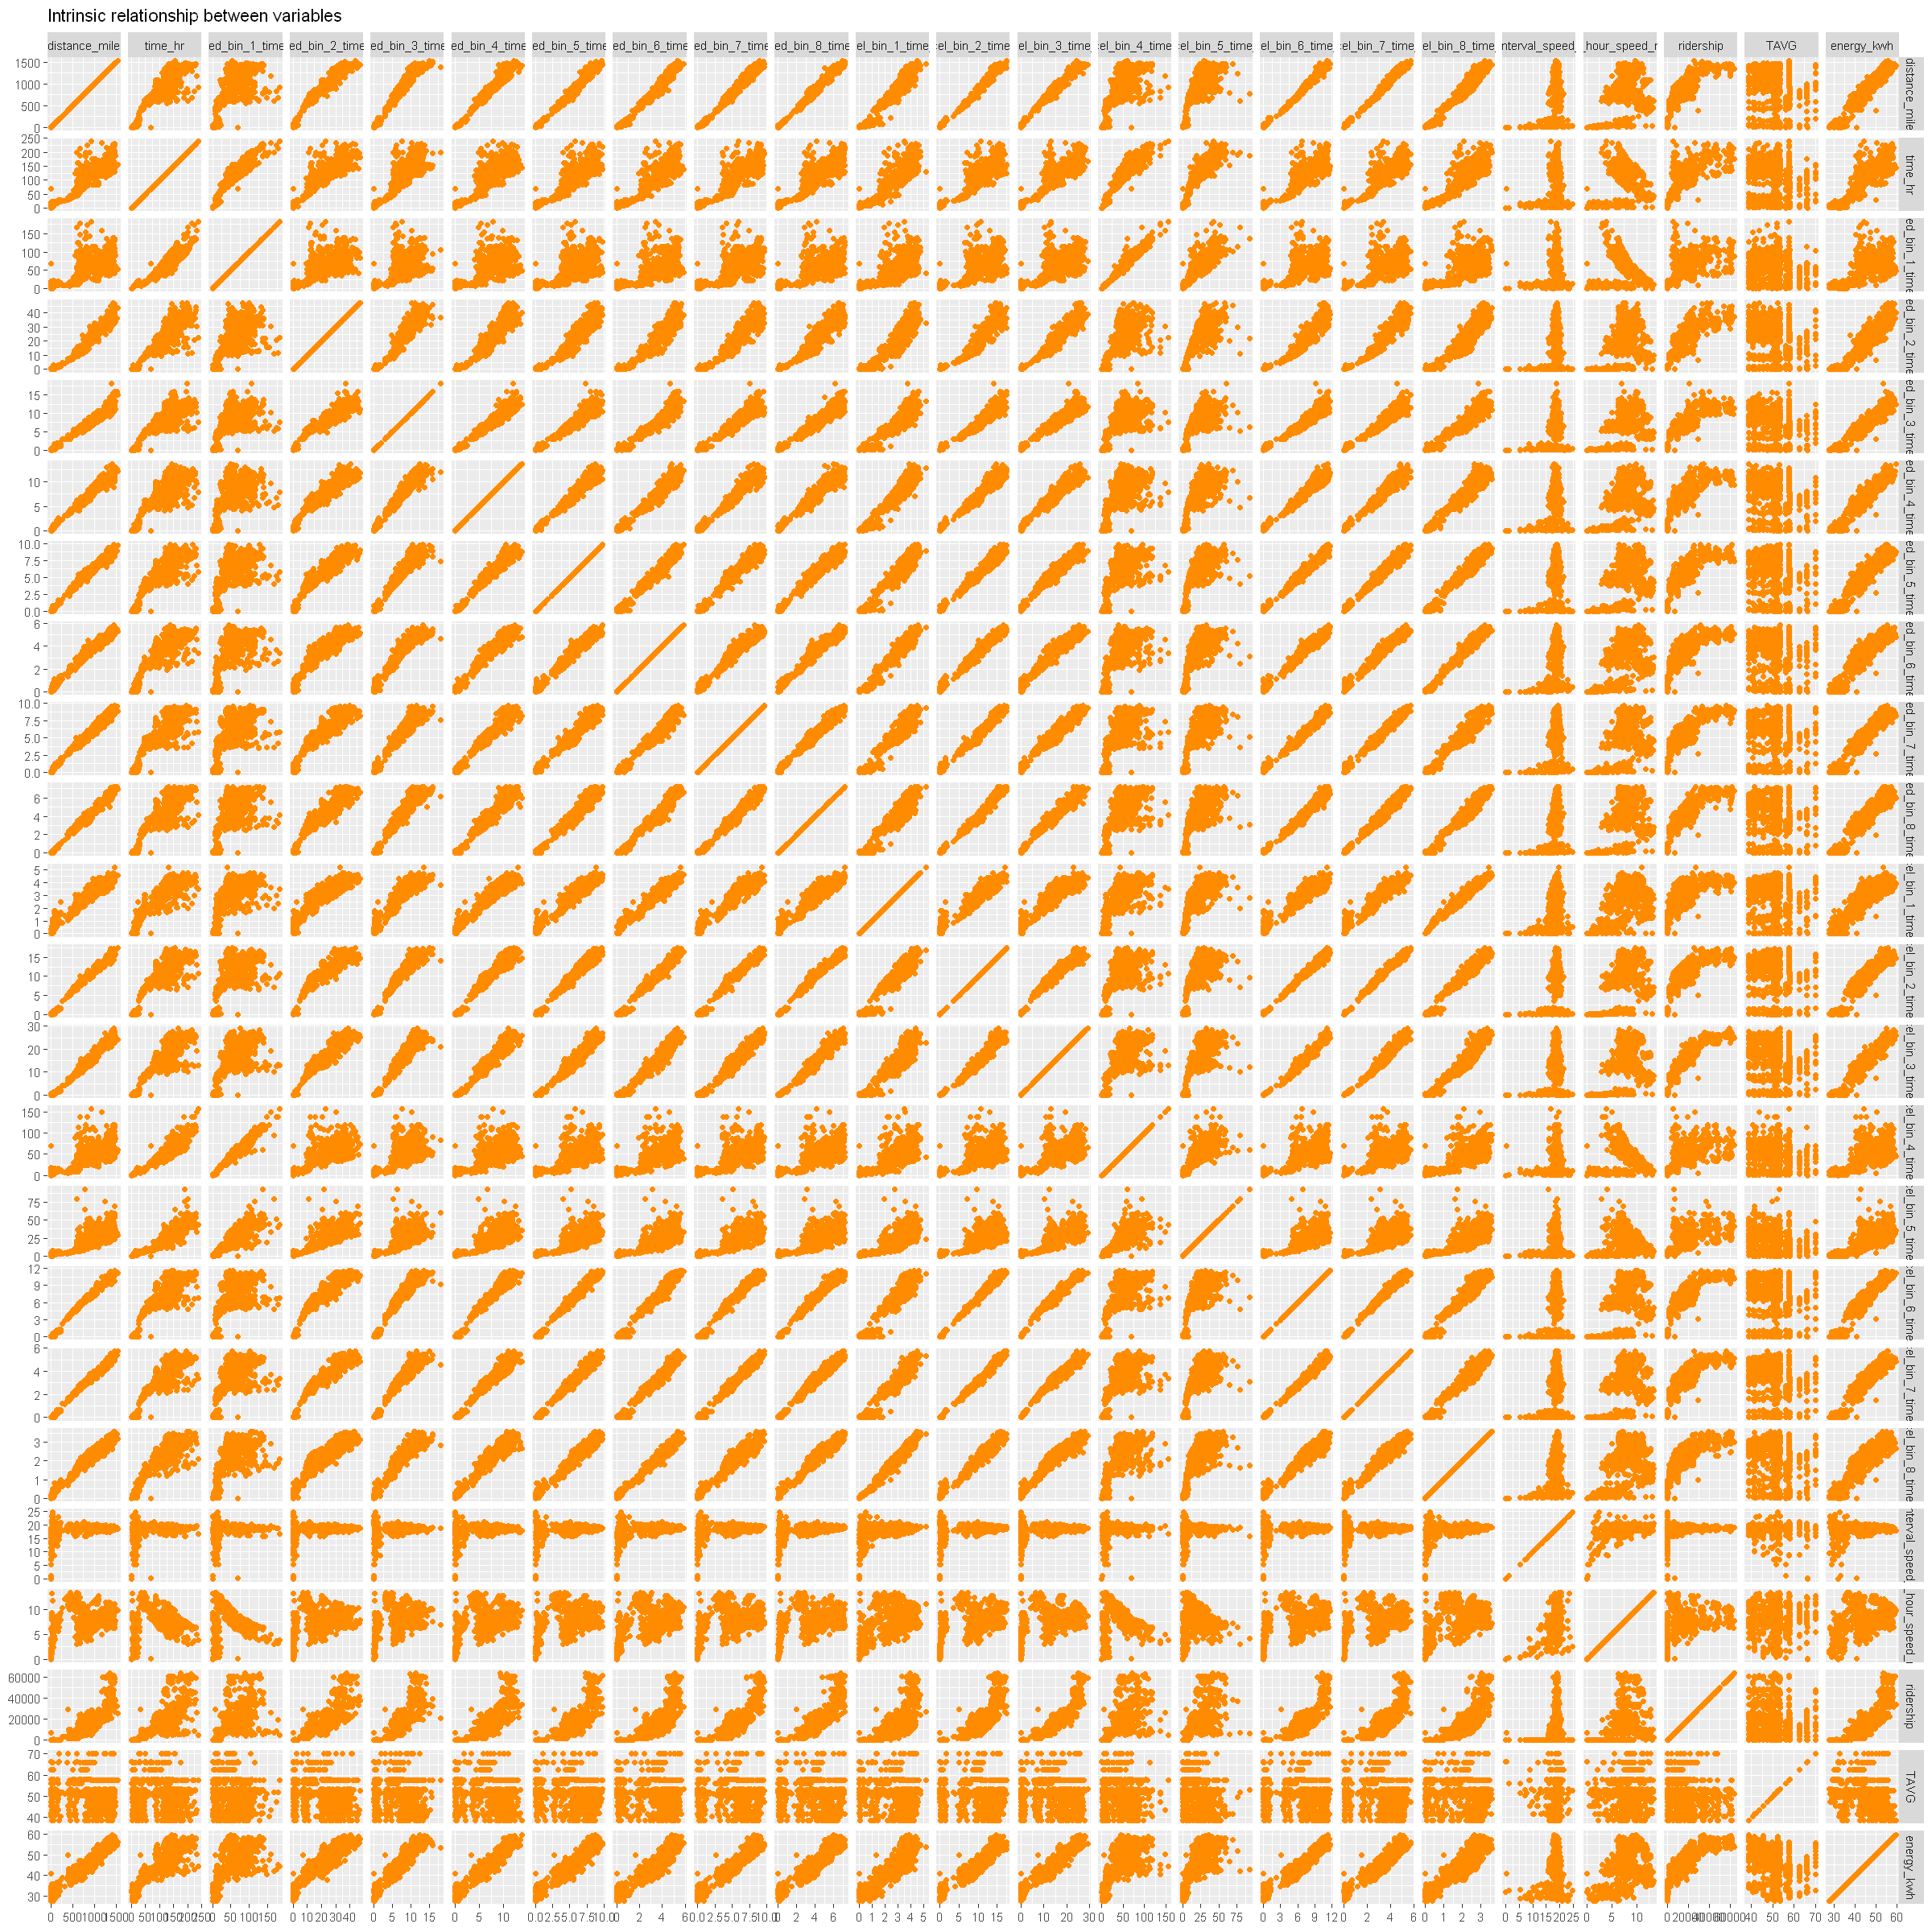

In [22]:
# png("../../figures/Intrinsic-relationship-plot-April-2019.png",height=6000,width=6000,res=360)
PairPlot(df_var_plot,colnames(df_var_plot),title = "Intrinsic relationship between variables",palette=NULL,point_color = "darkorange")
# dev.off()

In [20]:
# Plot correlaton scattered plot
options(repr.plot.width = 10, repr.plot.height = 10)
png("../../figures/Intrinsic-relationship-plot-April-2019.png",height=6000,width=6000,res=360)
PairPlot(df_var_plot,colnames(df_var_plot),"Intrinsic relationship between variables", palette=NULL,point_color = "darkorange")
dev.off()
# correleation plot with numbers
options(repr.plot.width = 20, repr.plot.height = 20)
png("../../figures/correleation-plot-April-2019.png",height=5000,width=5000,res=360)
corrplot(corr = matrix,method = "color",order = "hclust",tl.col="black",addrect=4,addCoef.col = "grey")
dev.off()
# options(repr.plot.width = 10, repr.plot.height = 10)
# pairs.panels(df_var_plot, 
#              method = "pearson", # correlation method
#              hist.col = "#00AFBB",
#              density = TRUE,  # show density plots
#              ellipses = TRUE, # show correlation ellipses
#              )

png 
  2

png 
  2

# linear regression

In [51]:
# Dummy variables transfer
df$weekends_weekday = as.factor(df$weekends_weekday)

In [52]:
#Split the hour data
dfh_train = df[df$day <= 23,]
dfh_test = df[df$day > 23,]

In [4]:
#Split the hour data
set.seed(1234)
rate = 0.8
sub = sample(1:nrow(df),round(nrow(df)*rate))#the split ratio is 0.8
dfh_train = df[sub,]
dfh_test = df[-sub,]

In [29]:
# linear regression
modelFit_hour_linear= lm(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         # Speed bin
                         speed_bin_1_time_hr + speed_bin_2_time_hr + 
                         speed_bin_3_time_hr + speed_bin_4_time_hr + 
                         speed_bin_5_time_hr + speed_bin_6_time_hr +
                         speed_bin_7_time_hr + speed_bin_8_time_hr +
                         # Acceleration bin
                         accel_bin_1_time_hr + accel_bin_2_time_hr + 
                         accel_bin_3_time_hr + accel_bin_4_time_hr + 
                         accel_bin_5_time_hr + accel_bin_6_time_hr +
                         accel_bin_7_time_hr + accel_bin_8_time_hr +
                         # Interaction term
                         speed_bin_1_time_hr* accel_bin_1_time_hr +
                         speed_bin_1_time_hr* accel_bin_2_time_hr + 
                         speed_bin_1_time_hr* accel_bin_3_time_hr +
                         speed_bin_1_time_hr* accel_bin_4_time_hr +
                         speed_bin_1_time_hr* accel_bin_5_time_hr +
                         speed_bin_1_time_hr* accel_bin_6_time_hr +
                         speed_bin_1_time_hr* accel_bin_7_time_hr +
                         speed_bin_1_time_hr* accel_bin_8_time_hr +
                         speed_bin_2_time_hr* accel_bin_1_time_hr +
                         speed_bin_2_time_hr* accel_bin_2_time_hr + 
                         speed_bin_2_time_hr* accel_bin_3_time_hr +
                         speed_bin_2_time_hr* accel_bin_4_time_hr +
                         speed_bin_2_time_hr* accel_bin_5_time_hr +
                         speed_bin_2_time_hr* accel_bin_6_time_hr +
                         speed_bin_2_time_hr* accel_bin_7_time_hr +
                         speed_bin_2_time_hr* accel_bin_8_time_hr +
                         speed_bin_3_time_hr* accel_bin_1_time_hr +
                         speed_bin_3_time_hr* accel_bin_2_time_hr + 
                         speed_bin_3_time_hr* accel_bin_3_time_hr +
                         speed_bin_3_time_hr* accel_bin_4_time_hr +
                         speed_bin_3_time_hr* accel_bin_5_time_hr +
                         speed_bin_3_time_hr* accel_bin_6_time_hr +
                         speed_bin_3_time_hr* accel_bin_7_time_hr +
                         speed_bin_3_time_hr* accel_bin_8_time_hr +
                         speed_bin_4_time_hr* accel_bin_1_time_hr +
                         speed_bin_4_time_hr* accel_bin_2_time_hr + 
                         speed_bin_4_time_hr* accel_bin_3_time_hr +
                         speed_bin_4_time_hr* accel_bin_4_time_hr +
                         speed_bin_4_time_hr* accel_bin_5_time_hr +
                         speed_bin_4_time_hr* accel_bin_6_time_hr +
                         speed_bin_4_time_hr* accel_bin_7_time_hr +
                         speed_bin_4_time_hr* accel_bin_8_time_hr +
                         speed_bin_5_time_hr* accel_bin_1_time_hr +
                         speed_bin_5_time_hr* accel_bin_2_time_hr + 
                         speed_bin_5_time_hr* accel_bin_3_time_hr +
                         speed_bin_5_time_hr* accel_bin_4_time_hr +
                         speed_bin_5_time_hr* accel_bin_5_time_hr +
                         speed_bin_5_time_hr* accel_bin_6_time_hr +
                         speed_bin_5_time_hr* accel_bin_7_time_hr +
                         speed_bin_5_time_hr* accel_bin_8_time_hr +
                         
                         speed_bin_6_time_hr* accel_bin_1_time_hr +
                         speed_bin_6_time_hr* accel_bin_2_time_hr + 
                         speed_bin_6_time_hr* accel_bin_3_time_hr +
                         speed_bin_6_time_hr* accel_bin_4_time_hr +
                         speed_bin_6_time_hr* accel_bin_5_time_hr +
                         speed_bin_6_time_hr* accel_bin_6_time_hr +
                         speed_bin_6_time_hr* accel_bin_7_time_hr +
                         speed_bin_6_time_hr* accel_bin_8_time_hr +
                         
                         speed_bin_7_time_hr* accel_bin_1_time_hr +
                         speed_bin_7_time_hr* accel_bin_2_time_hr + 
                         speed_bin_7_time_hr* accel_bin_3_time_hr +
                         speed_bin_7_time_hr* accel_bin_4_time_hr +
                         speed_bin_7_time_hr* accel_bin_5_time_hr +
                         speed_bin_7_time_hr* accel_bin_6_time_hr +
                         speed_bin_7_time_hr* accel_bin_7_time_hr +
                         speed_bin_7_time_hr* accel_bin_8_time_hr +
                         
                         speed_bin_8_time_hr* accel_bin_1_time_hr +
                         speed_bin_8_time_hr* accel_bin_2_time_hr + 
                         speed_bin_8_time_hr* accel_bin_3_time_hr +
                         speed_bin_8_time_hr* accel_bin_4_time_hr +
                         speed_bin_8_time_hr* accel_bin_5_time_hr +
                         speed_bin_8_time_hr* accel_bin_6_time_hr +
                         speed_bin_8_time_hr* accel_bin_7_time_hr +
                         speed_bin_8_time_hr* accel_bin_8_time_hr +
                         TAVG,data = dfh_train) #select=TRUE weekends_weekday)

In [30]:
linear_result = summary(modelFit_hour_linear)

In [31]:
linear_result


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_1_time_hr + speed_bin_2_time_hr + 
    speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr + 
    speed_bin_6_time_hr + speed_bin_7_time_hr + speed_bin_8_time_hr + 
    accel_bin_1_time_hr + accel_bin_2_time_hr + accel_bin_3_time_hr + 
    accel_bin_4_time_hr + accel_bin_5_time_hr + accel_bin_6_time_hr + 
    accel_bin_7_time_hr + accel_bin_8_time_hr + speed_bin_1_time_hr * 
    accel_bin_1_time_hr + speed_bin_1_time_hr * accel_bin_2_time_hr + 
    speed_bin_1_time_hr * accel_bin_3_time_hr + speed_bin_1_time_hr * 
    accel_bin_4_time_hr + speed_bin_1_time_hr * accel_bin_5_time_hr + 
    speed_bin_1_time_hr * accel_bin_6_time_hr + speed_bin_1_time_hr * 
    accel_bin_7_time_hr + speed_bin_1_time_hr * accel_bin_8_time_hr + 
    speed_bin_2_time_hr * accel_bin_1_time_hr + speed_bin_2_time_hr * 
    accel_bin_2_time_hr + speed_bin_2_time_hr * accel_bin_3_time_hr + 
    spe

In [32]:
# Check the coefficient of linear regression model
linear_coe = linear_result$coefficients
linear_coe = data.frame(linear_coe)
linear_coe$variables_name = rownames(linear_coe)

In [33]:
linear_coe

,Estimate,Std..Error,t.value,Pr...t..,variables_name
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),3.654586e+01,9.707512e-01,37.6469888,2.412130e-138,(Intercept)
ridership,8.889445e-05,1.780862e-05,4.9916526,8.705700e-07,ridership
avg_interval_speed_mph,-1.222915e-01,4.513206e-02,-2.7096372,7.004289e-03,avg_interval_speed_mph
avg_hour_speed_mph,4.641822e-01,9.250413e-02,5.0179617,7.651663e-07,avg_hour_speed_mph
speed_bin_1_time_hr,-5.014317e+00,4.153483e+00,-1.2072559,2.279957e-01,speed_bin_1_time_hr
speed_bin_2_time_hr,-5.457287e+00,4.173581e+00,-1.3075788,1.917133e-01,speed_bin_2_time_hr
speed_bin_3_time_hr,-4.685187e+00,4.143713e+00,-1.1306736,2.588213e-01,speed_bin_3_time_hr
speed_bin_4_time_hr,-5.471245e+00,4.231688e+00,-1.2929225,1.967305e-01,speed_bin_4_time_hr
speed_bin_5_time_hr,-3.654305e+00,4.265472e+00,-0.8567176,3.920770e-01,speed_bin_5_time_hr


Warning message:
"Removed 13 rows containing missing values (geom_point)."


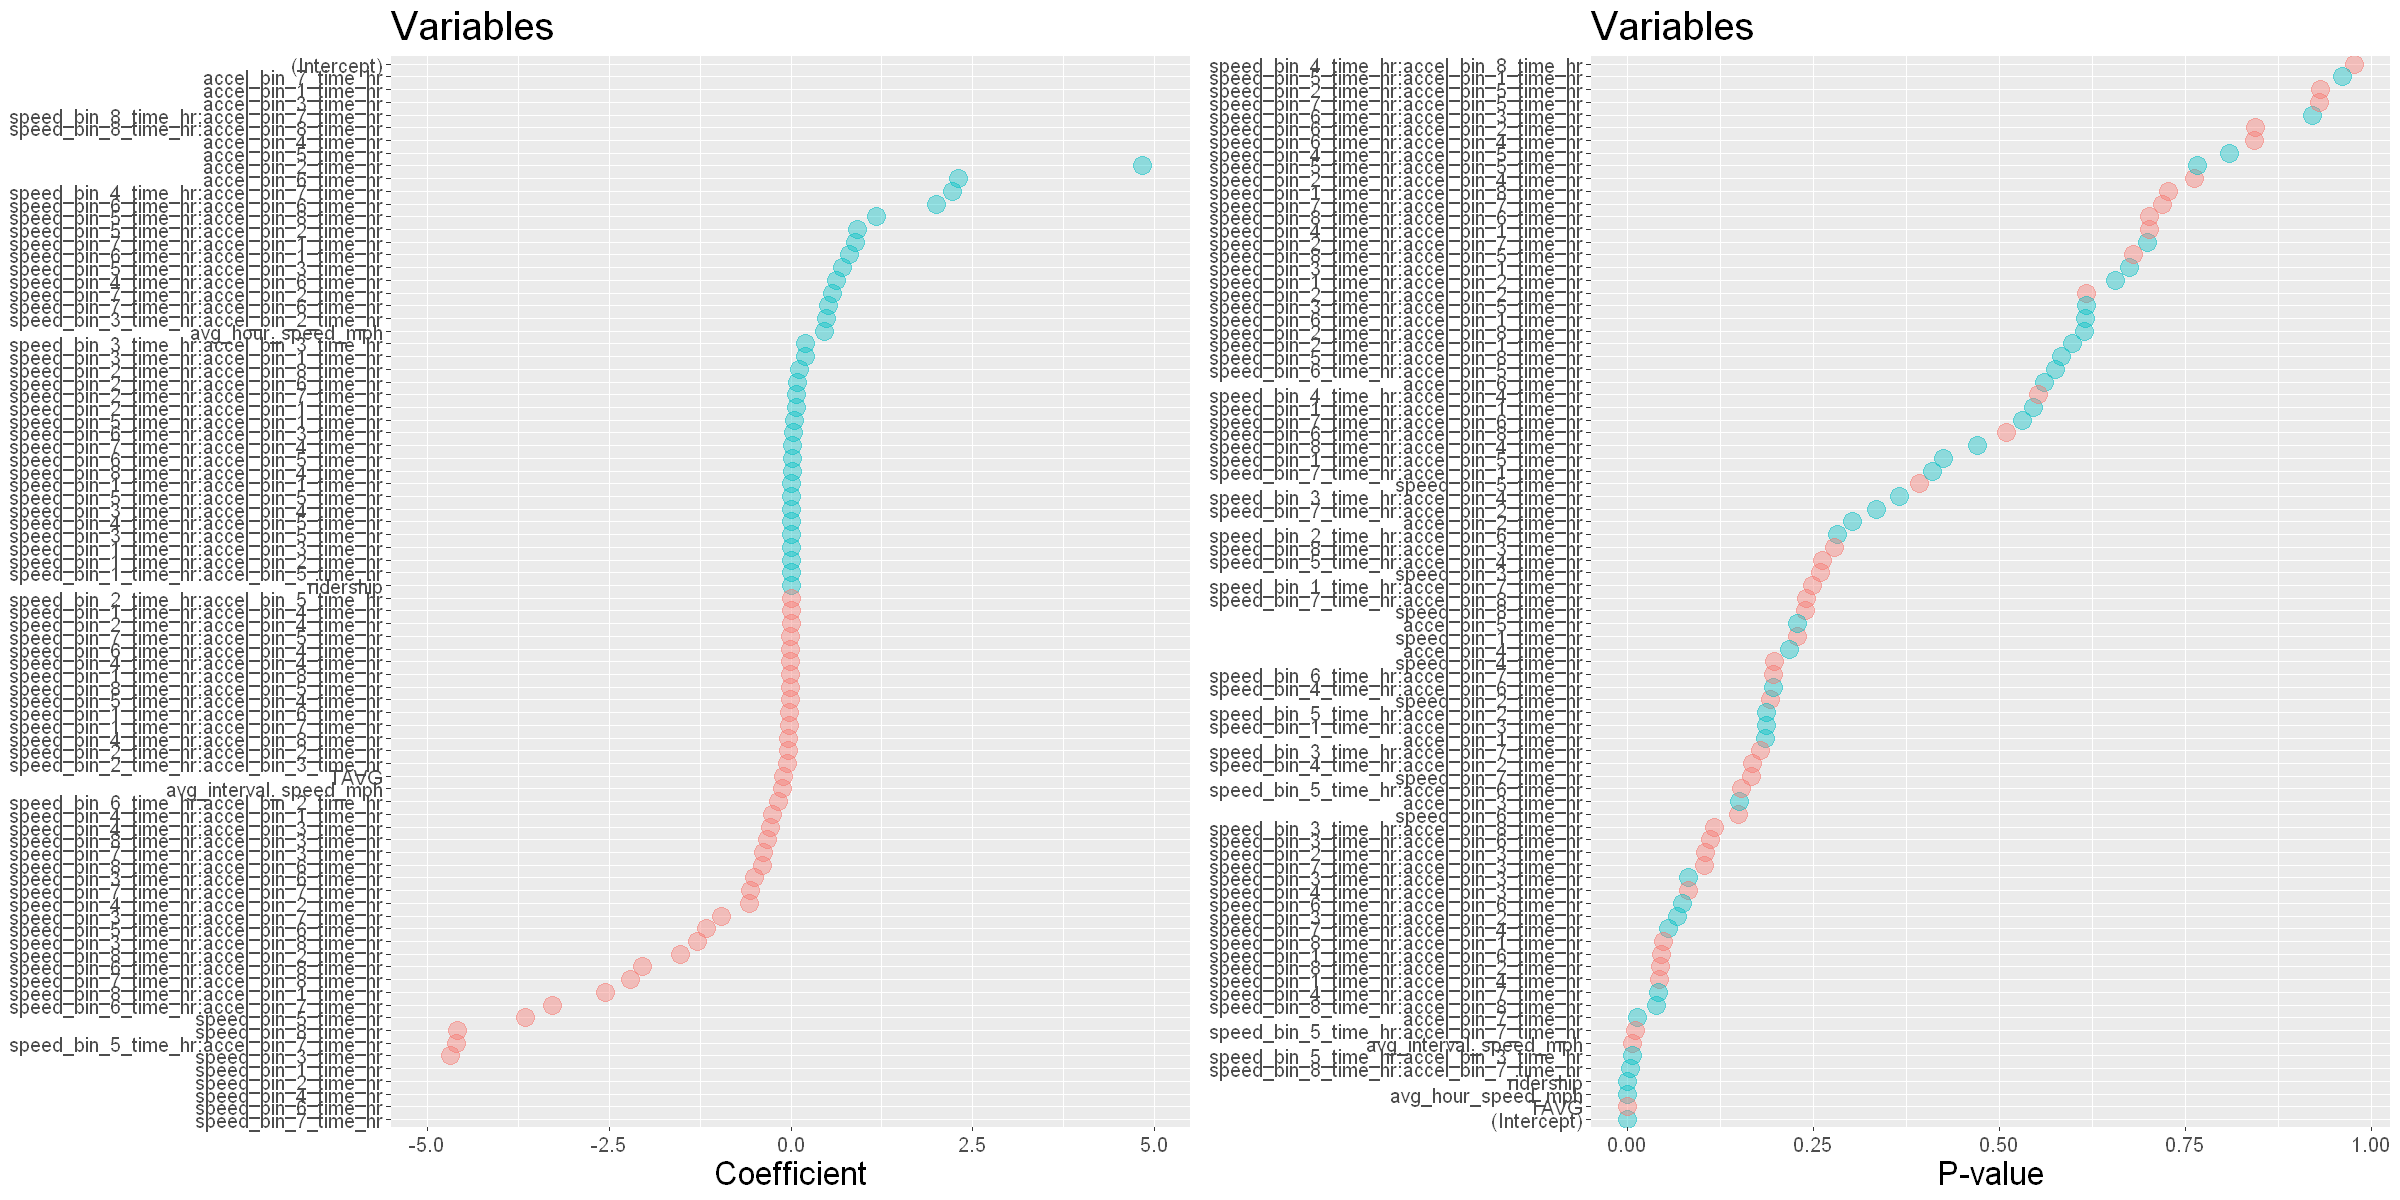

In [38]:
# Plot linear regression coef
p1 = ggplot(linear_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-5,5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)
p2 = ggplot(linear_coe,aes(Pr...t.., reorder(variables_name,Pr...t..), color = Estimate > 0)) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("P-value") +
  ylab(NULL)
options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(p1, p2,ncol=2, nrow=1)

In [42]:
# Linear model prediction
pred_linear <- predict.lm(modelFit_hour_linear, dfh_test)

In [46]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot_linear = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


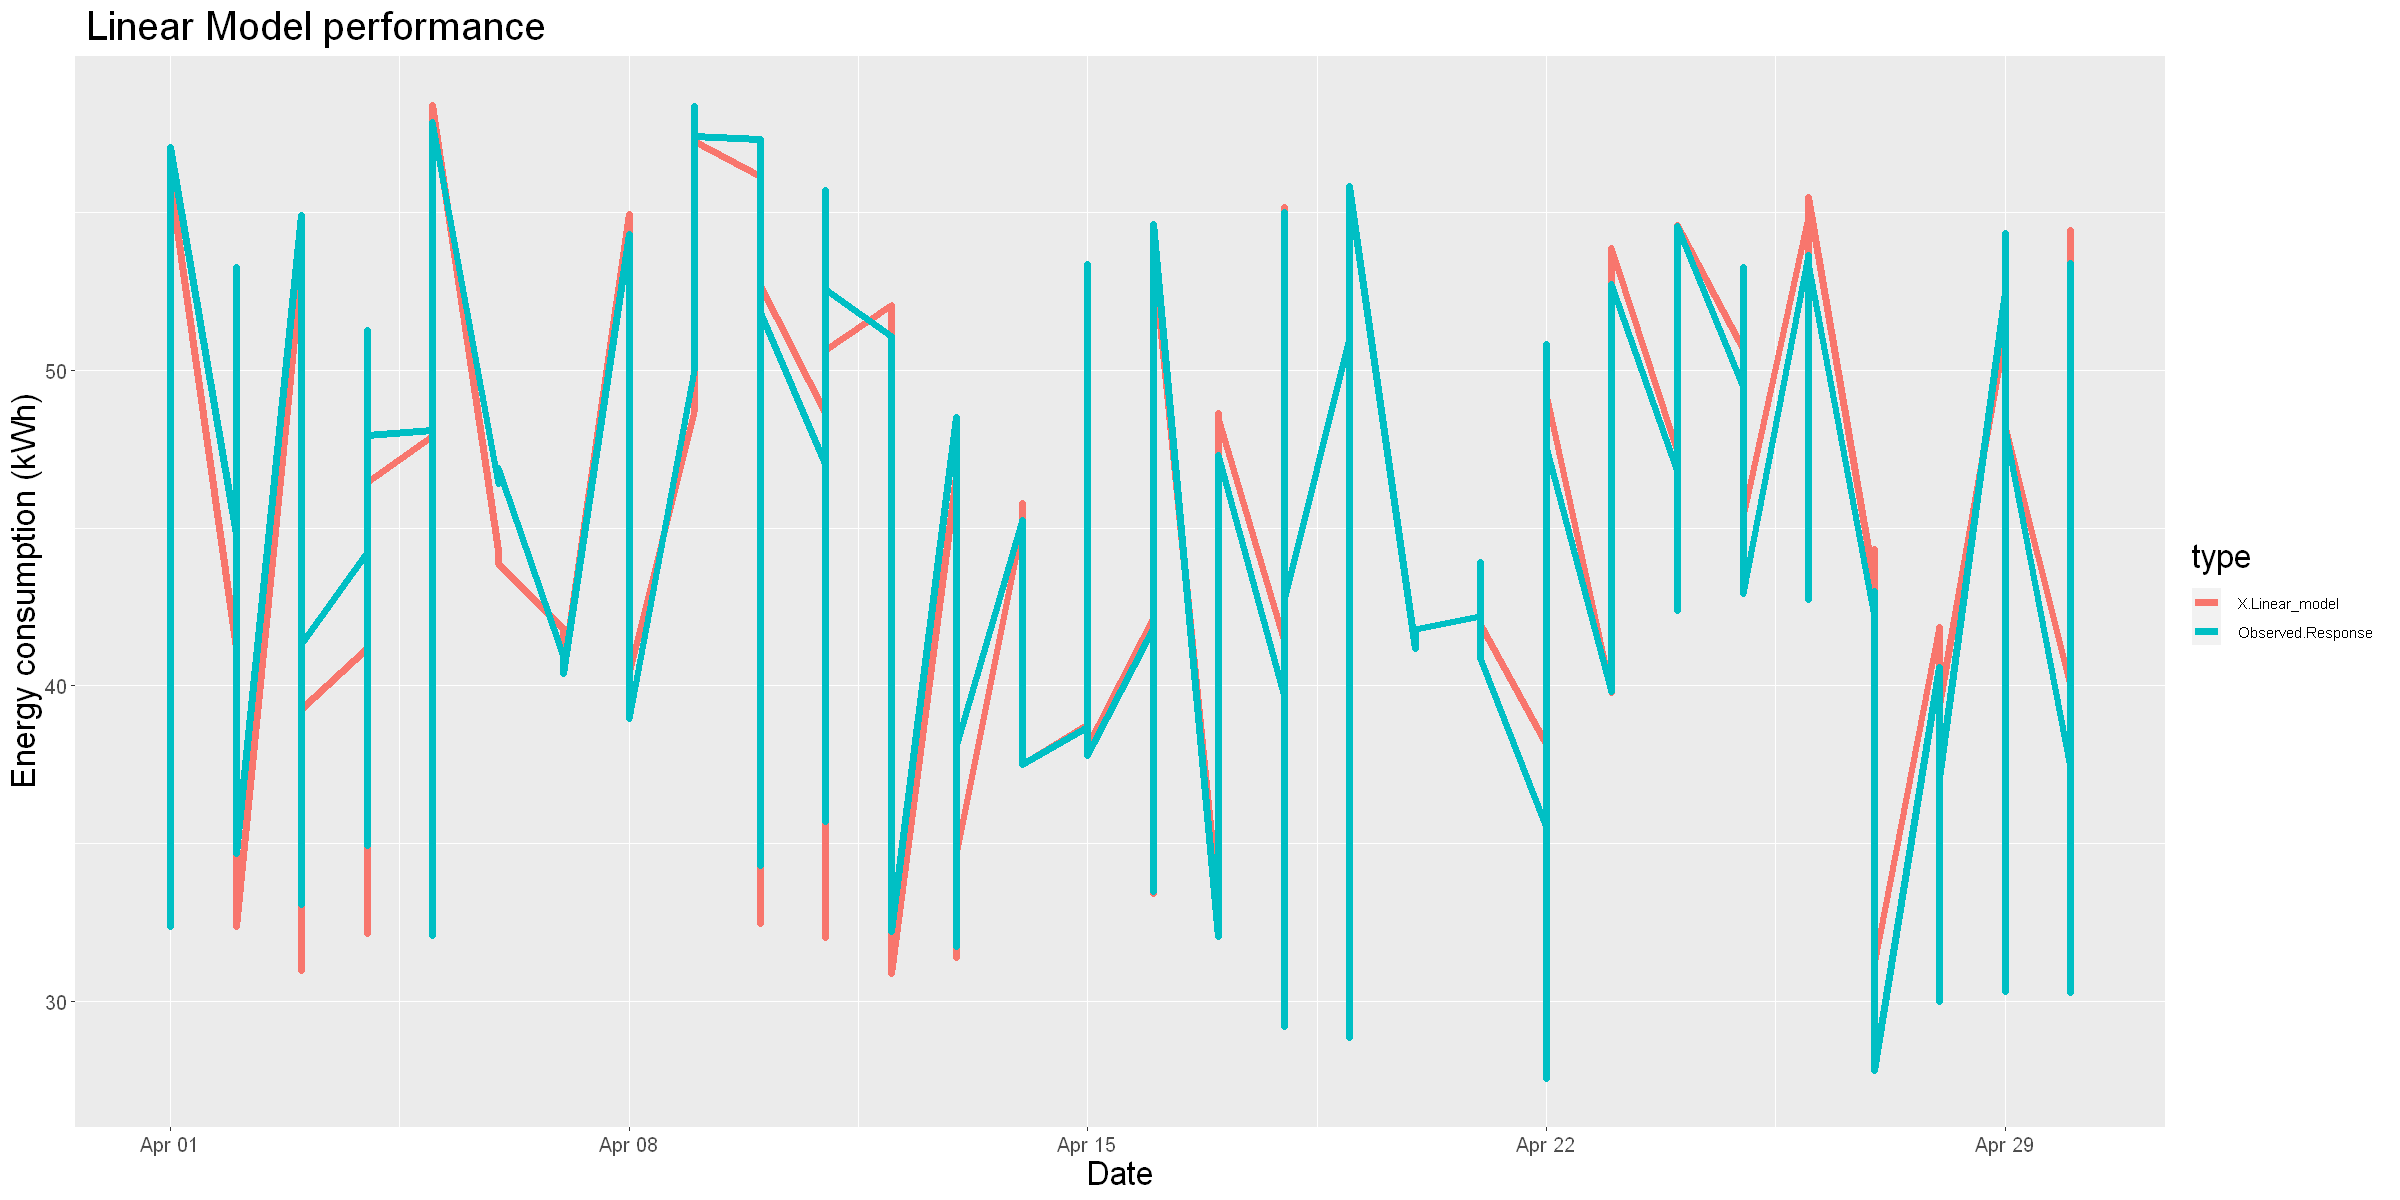

In [55]:
# png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare_plot_linear) + 
 geom_line(aes(x = Date, y = x,color =type,),size = 2,alpha = 1,) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
# dev.off()

In [50]:
head(df)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,2019,4,1,10,1792.540,244.4475,117.0064,57.09028,17.18444,...,56.75222,14.85361,6.315833,4.516111,17.43370,7.333027,19134.9,0,42,53.894
7,7,2019,4,1,11,1655.929,245.9167,124.8353,55.15056,17.76306,...,99.53000,13.22083,5.383889,3.819167,16.60618,6.733701,17253.1,0,42,49.551
8,8,2019,4,1,12,1558.590,241.7983,130.5450,51.00083,14.93667,...,70.79472,13.06861,5.496389,4.029722,17.63646,6.445826,17870.3,0,42,48.963
9,9,2019,4,1,13,1483.327,223.1367,121.0853,44.08194,14.03083,...,59.69111,13.13361,5.390556,3.650000,17.21894,6.647617,18464.4,0,42,49.200
10,10,2019,4,1,14,1593.426,240.4753,126.0211,55.03500,13.36694,...,53.32778,14.44944,5.686944,3.901667,18.19824,6.626151,24528.1,0,42,50.928
11,11,2019,4,1,15,1868.968,266.9275,136.6403,60.71556,14.16000,...,51.82750,16.18861,6.866944,4.368333,18.90773,7.001781,31965.0,0,42,54.272


# variable preparation

In [53]:
# dfh_test = dfh_test[,-27]
# dfh_test = na.omit(dfh_test)

dfh_test$speed_bin_1_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_6_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_7_time_hr
dfh_test$speed_bin_1_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_1_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_2_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_1_time_hr

dfh_test$speed_bin_2_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_6_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_7_time_hr
dfh_test$speed_bin_2_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_2_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_3_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_2_time_hr

dfh_test$speed_bin_3_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_6_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_7_time_hr
dfh_test$speed_bin_3_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_3_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_4_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_3_time_hr

dfh_test$speed_bin_4_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_6_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_7_time_hr
dfh_test$speed_bin_4_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_4_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_5_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_4_time_hr

dfh_test$speed_bin_5_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_6_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_7_time_hr
dfh_test$speed_bin_5_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_5_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_6_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_6_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_6_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_6_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_6_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_5_time_hr

dfh_test$speed_bin_6_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_7_time_hr
dfh_test$speed_bin_6_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_6_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_7_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_7_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_7_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_7_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_7_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_7_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_6_time_hr

dfh_test$speed_bin_7_time_hr_accel_bin_8_time_hr = dfh_test$speed_bin_7_time_hr* dfh_test$accel_bin_8_time_hr

dfh_test$speed_bin_8_time_hr_accel_bin_1_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_1_time_hr
dfh_test$speed_bin_8_time_hr_accel_bin_2_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_2_time_hr
dfh_test$speed_bin_8_time_hr_accel_bin_3_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_3_time_hr
dfh_test$speed_bin_8_time_hr_accel_bin_4_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_4_time_hr
dfh_test$speed_bin_8_time_hr_accel_bin_5_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_5_time_hr
dfh_test$speed_bin_8_time_hr_accel_bin_6_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_6_time_hr
dfh_test$speed_bin_8_time_hr_accel_bin_7_time_hr = dfh_test$speed_bin_8_time_hr* dfh_test$accel_bin_7_time_hr

In [54]:
# dfh_train = dfh_train[,-27]
# dfh_train = na.omit(dfh_train)

dfh_train$speed_bin_1_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_6_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_7_time_hr
dfh_train$speed_bin_1_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_1_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_2_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_1_time_hr

dfh_train$speed_bin_2_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_6_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_7_time_hr
dfh_train$speed_bin_2_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_2_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_3_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_2_time_hr

dfh_train$speed_bin_3_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_6_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_7_time_hr
dfh_train$speed_bin_3_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_3_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_4_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_3_time_hr

dfh_train$speed_bin_4_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_6_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_7_time_hr
dfh_train$speed_bin_4_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_4_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_5_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_4_time_hr

dfh_train$speed_bin_5_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_6_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_7_time_hr
dfh_train$speed_bin_5_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_5_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_6_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_6_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_6_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_6_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_6_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_5_time_hr

dfh_train$speed_bin_6_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_7_time_hr
dfh_train$speed_bin_6_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_6_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_7_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_7_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_7_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_7_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_7_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_7_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_6_time_hr

dfh_train$speed_bin_7_time_hr_accel_bin_8_time_hr = dfh_train$speed_bin_7_time_hr* dfh_train$accel_bin_8_time_hr

dfh_train$speed_bin_8_time_hr_accel_bin_1_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_1_time_hr
dfh_train$speed_bin_8_time_hr_accel_bin_2_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_2_time_hr
dfh_train$speed_bin_8_time_hr_accel_bin_3_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_3_time_hr
dfh_train$speed_bin_8_time_hr_accel_bin_4_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_4_time_hr
dfh_train$speed_bin_8_time_hr_accel_bin_5_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_5_time_hr
dfh_train$speed_bin_8_time_hr_accel_bin_6_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_6_time_hr
dfh_train$speed_bin_8_time_hr_accel_bin_7_time_hr = dfh_train$speed_bin_8_time_hr* dfh_train$accel_bin_7_time_hr

In [186]:
head(dfh_train)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,speed_bin_7_time_hr_accel_bin_5_time_hr,speed_bin_7_time_hr_accel_bin_6_time_hr,speed_bin_7_time_hr_accel_bin_8_time_hr,speed_bin_8_time_hr_accel_bin_1_time_hr,speed_bin_8_time_hr_accel_bin_2_time_hr,speed_bin_8_time_hr_accel_bin_3_time_hr,speed_bin_8_time_hr_accel_bin_4_time_hr,speed_bin_8_time_hr_accel_bin_5_time_hr,speed_bin_8_time_hr_accel_bin_6_time_hr,speed_bin_8_time_hr_accel_bin_7_time_hr
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,2019,4,1,10,1205.696,136.5372,56.91806,32.69000,11.180833,...,237.4582,61.91539,18.09582,19.87990,66.66252,104.04676,272.1090,182.4995,47.58535,22.64570
7,7,2019,4,1,11,1056.887,130.5997,58.60944,31.41056,9.850833,...,179.7986,45.98293,12.61811,14.18915,53.19924,78.58890,237.9218,145.0441,37.09457,16.66961
8,8,2019,4,1,12,1039.803,135.3053,64.39000,32.45500,9.398611,...,225.9415,48.42466,14.49713,14.03167,49.24218,71.42875,233.4401,154.2087,33.05060,16.29068
9,9,2019,4,1,13,964.337,124.2056,62.16806,25.62361,8.023056,...,197.0830,45.57570,12.74359,13.44779,48.62420,68.77873,195.7894,144.5445,33.42611,14.84803
10,10,2019,4,1,14,1104.210,146.9653,75.02750,30.89694,8.911944,...,206.9199,58.06530,16.05167,17.57499,64.86682,98.31217,337.7963,165.6810,46.49297,20.72421
11,11,2019,4,1,15,1303.568,163.2072,78.07306,37.53139,9.688889,...,286.0246,89.02416,23.62245,21.79324,89.97064,141.22558,437.6174,201.7209,62.78492,29.91179


In [187]:
colnames(x)

[1] "distance_mile"                          
 [2] "time_hr"                                
 [3] "speed_bin_1_time_hr"                    
 [4] "speed_bin_2_time_hr"                    
 [5] "speed_bin_3_time_hr"                    
 [6] "speed_bin_4_time_hr"                    
 [7] "speed_bin_5_time_hr"                    
 [8] "speed_bin_6_time_hr"                    
 [9] "speed_bin_7_time_hr"                    
[10] "speed_bin_8_time_hr"                    
[11] "accel_bin_1_time_hr"                    
[12] "accel_bin_2_time_hr"                    
[13] "accel_bin_3_time_hr"                    
[14] "accel_bin_4_time_hr"                    
[15] "accel_bin_5_time_hr"                    
[16] "accel_bin_6_time_hr"                    
[17] "accel_bin_7_time_hr"                    
[18] "accel_bin_8_time_hr"                    
[19] "avg_interval_speed_mph"                 
[20] "avg_hour_speed_mph"                     
[21] "ridership"                              
[22] "TAVG"                                   
[23] "energy_kwh"                             
[24] "weekend"                                
[25] "speed_bin_1_time_hr_accel_bin_2_time_hr"
[26] "speed_bin_1_time_hr_accel_bin_3_time_hr"
[27] "speed_bin_1_time_hr_accel_bin_4_time_hr"
[28] "speed_bin_1_time_hr_accel_bin_5_time_hr"
[29] "speed_bin_1_time_hr_accel_bin_6_time_hr"
[30] "speed_bin_1_time_hr_accel_bin_7_time_hr"
[31] "speed_bin_1_time_hr_accel_bin_8_time_hr"
[32] "speed_bin_2_time_hr_accel_bin_1_time_hr"
[33] "speed_bin_2_time_hr_accel_bin_3_time_hr"
[34] "speed_bin_2_time_hr_accel_bin_4_time_hr"
[35] "speed_bin_2_time_hr_accel_bin_5_time_hr"
[36] "speed_bin_2_time_hr_accel_bin_6_time_hr"
[37] "speed_bin_2_time_hr_accel_bin_7_time_hr"
[38] "speed_bin_2_time_hr_accel_bin_8_time_hr"
[39] "speed_bin_3_time_hr_accel_bin_1_time_hr"
[40] "speed_bin_3_time_hr_accel_bin_2_time_hr"
[41] "speed_bin_3_time_hr_accel_bin_4_time_hr"
[42] "speed_bin_3_time_hr_accel_bin_5_time_hr"
[43] "speed_bin_3_time_hr_accel_bin_6_time_hr"
[44] "speed_bin_3_time_hr_accel_bin_7_time_hr"
[45] "speed_bin_3_time_hr_accel_bin_8_time_hr"
[46] "speed_bin_4_time_hr_accel_bin_1_time_hr"
[47] "speed_bin_4_time_hr_accel_bin_2_time_hr"
[48] "speed_bin_4_time_hr_accel_bin_3_time_hr"
[49] "speed_bin_4_time_hr_accel_bin_5_time_hr"
[50] "speed_bin_4_time_hr_accel_bin_6_time_hr"
[51] "speed_bin_4_time_hr_accel_bin_7_time_hr"
[52] "speed_bin_4_time_hr_accel_bin_8_time_hr"
[53] "speed_bin_5_time_hr_accel_bin_1_time_hr"
[54] "speed_bin_5_time_hr_accel_bin_2_time_hr"
[55] "speed_bin_5_time_hr_accel_bin_3_time_hr"
[56] "speed_bin_5_time_hr_accel_bin_4_time_hr"
[57] "speed_bin_5_time_hr_accel_bin_6_time_hr"
[58] "speed_bin_5_time_hr_accel_bin_7_time_hr"
[59] "speed_bin_5_time_hr_accel_bin_8_time_hr"
[60] "speed_bin_6_time_hr_accel_bin_1_time_hr"
[61] "speed_bin_6_time_hr_accel_bin_2_time_hr"
[62] "speed_bin_6_time_hr_accel_bin_3_time_hr"
[63] "speed_bin_6_time_hr_accel_bin_4_time_hr"
[64] "speed_bin_6_time_hr_accel_bin_5_time_hr"
[65] "speed_bin_6_time_hr_accel_bin_7_time_hr"
[66] "speed_bin_6_time_hr_accel_bin_8_time_hr"
[67] "speed_bin_7_time_hr_accel_bin_1_time_hr"
[68] "speed_bin_7_time_hr_accel_bin_2_time_hr"
[69] "speed_bin_7_time_hr_accel_bin_3_time_hr"
[70] "speed_bin_7_time_hr_accel_bin_4_time_hr"
[71] "speed_bin_7_time_hr_accel_bin_5_time_hr"
[72] "speed_bin_7_time_hr_accel_bin_6_time_hr"
[73] "speed_bin_7_time_hr_accel_bin_8_time_hr"
[74] "speed_bin_8_time_hr_accel_bin_1_time_hr"
[75] "speed_bin_8_time_hr_accel_bin_2_time_hr"
[76] "speed_bin_8_time_hr_accel_bin_3_time_hr"
[77] "speed_bin_8_time_hr_accel_bin_4_time_hr"
[78] "speed_bin_8_time_hr_accel_bin_5_time_hr"
[79] "speed_bin_8_time_hr_accel_bin_6_time_hr"
[80] "speed_bin_8_time_hr_accel_bin_7_time_hr"

In [46]:
x = as.matrix(dfh_train[, -(1:5)])
x = x[, -23]
y = as.matrix(dfh_train[,"energy_kwh"])

# ridge regression

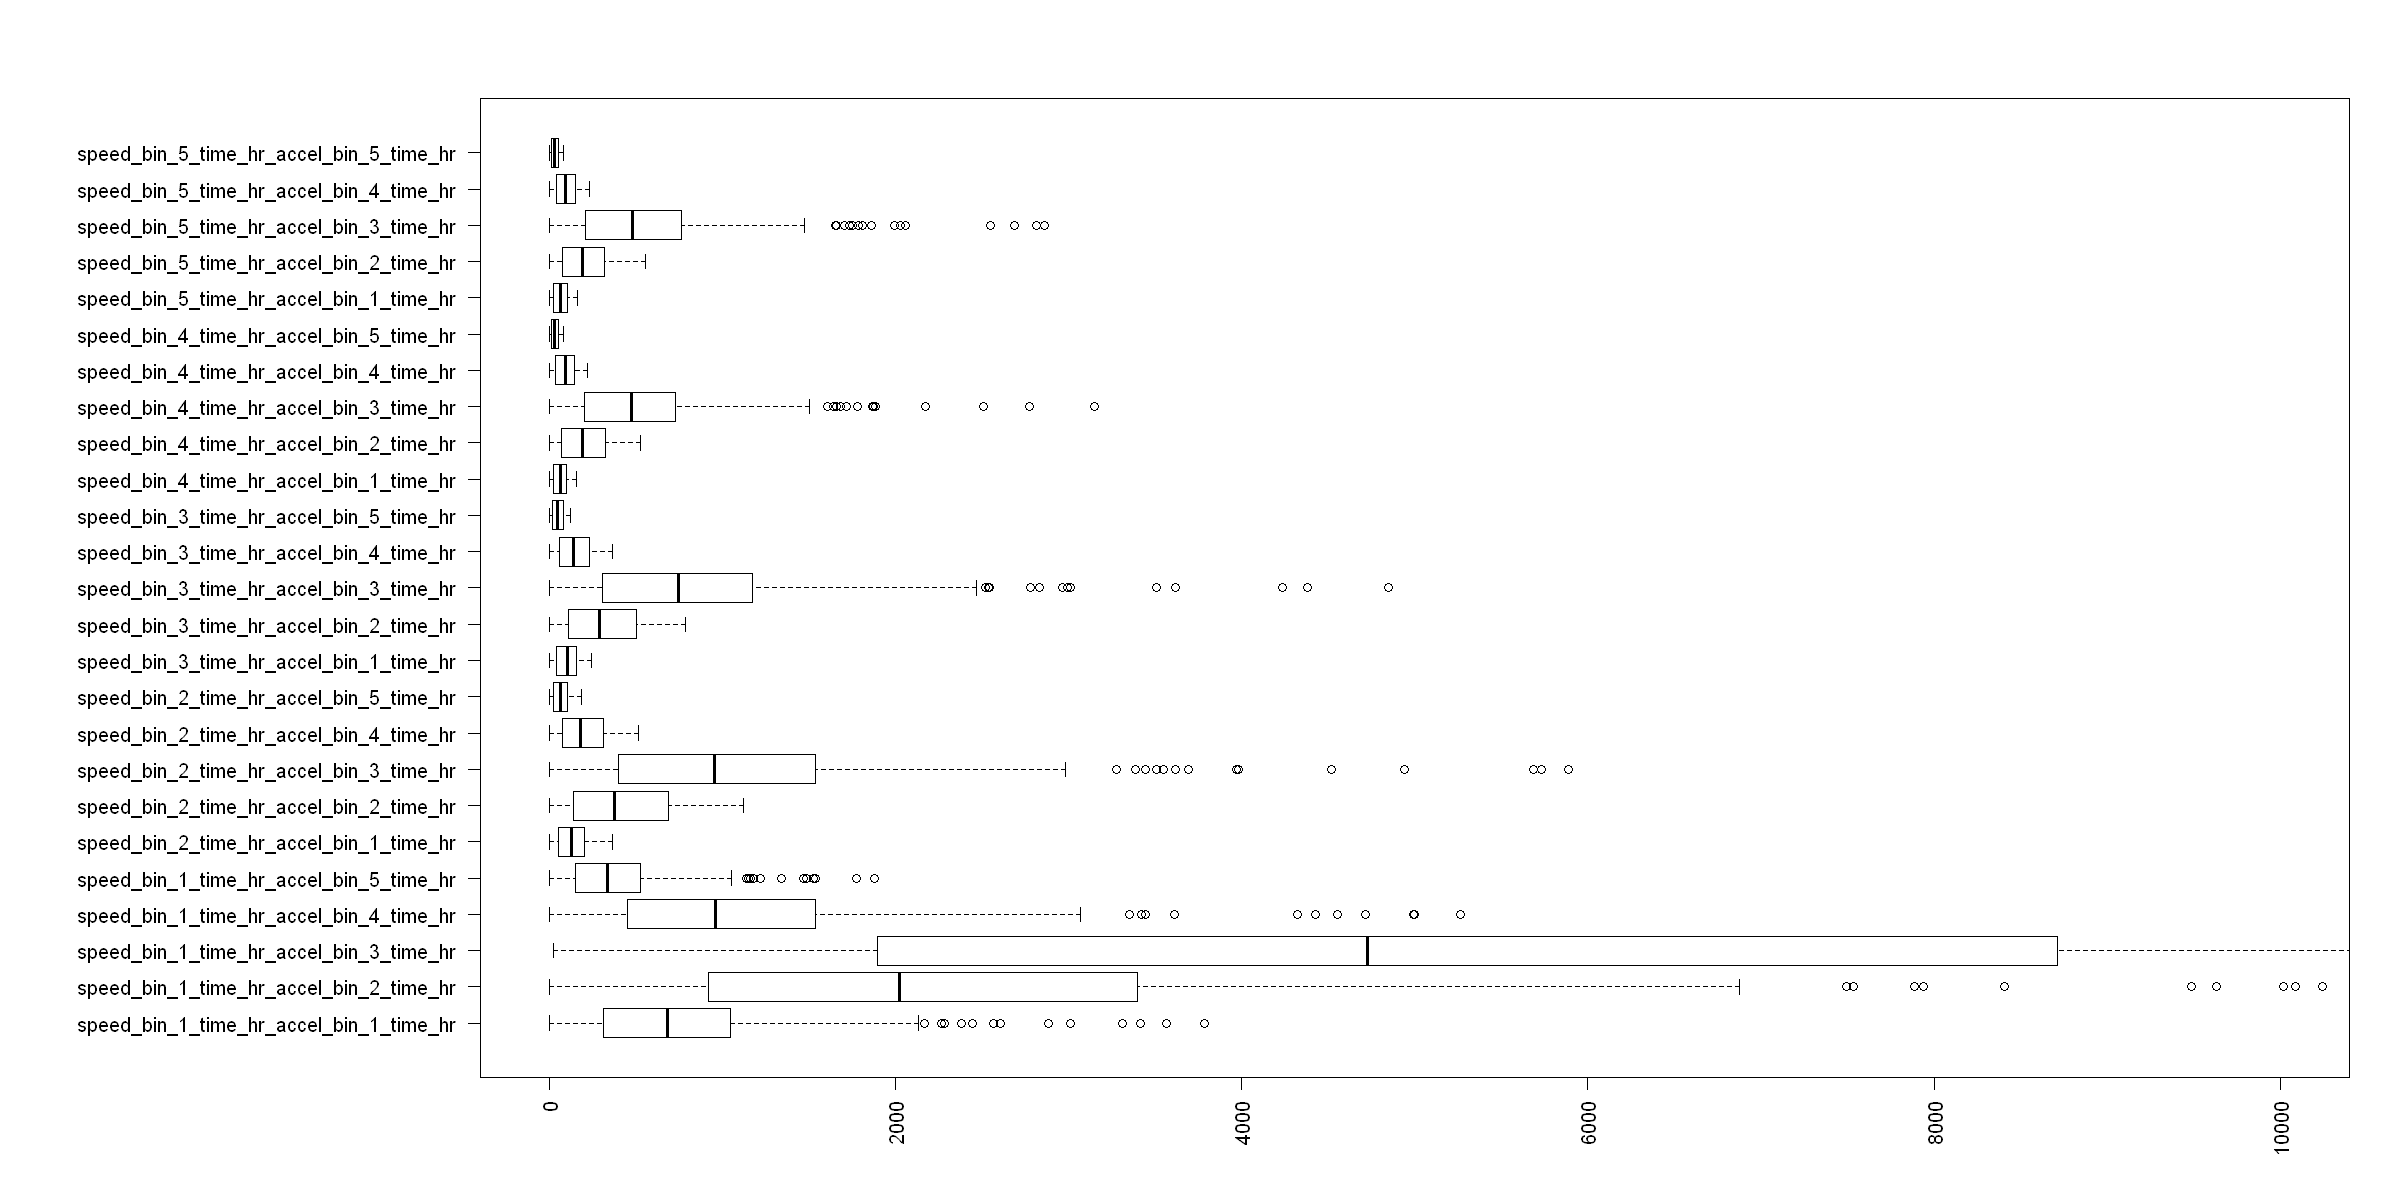

In [36]:
options(repr.plot.width = 20, repr.plot.height = 10)
par(mar=c(5.1, 20, 4.1, 2.1))
boxplot(dfh_train[,23:47], horizontal = TRUE, las=2,ylim = c(0,10000))

In [71]:
ridge <-  linearRidge(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         # Speed bin
                         speed_bin_1_time_hr + speed_bin_2_time_hr + 
                         speed_bin_3_time_hr +
                         speed_bin_4_time_hr + speed_bin_5_time_hr +
                         # Acceleration bin
                         accel_bin_1_time_hr + accel_bin_2_time_hr + 
                         accel_bin_3_time_hr + accel_bin_4_time_hr + 
                         accel_bin_5_time_hr +
                         # Interaction term
                         speed_bin_1_time_hr* accel_bin_1_time_hr +
                         speed_bin_1_time_hr* accel_bin_2_time_hr + 
                         speed_bin_1_time_hr* accel_bin_3_time_hr +
                         speed_bin_1_time_hr* accel_bin_4_time_hr +
                         speed_bin_1_time_hr* accel_bin_5_time_hr +
                         speed_bin_2_time_hr* accel_bin_1_time_hr +
                         speed_bin_2_time_hr* accel_bin_2_time_hr + 
                         speed_bin_2_time_hr* accel_bin_3_time_hr +
                         speed_bin_2_time_hr* accel_bin_4_time_hr +
                         speed_bin_2_time_hr* accel_bin_5_time_hr +
                         speed_bin_3_time_hr* accel_bin_1_time_hr +
                         speed_bin_3_time_hr* accel_bin_2_time_hr + 
                         speed_bin_3_time_hr* accel_bin_3_time_hr +
                         speed_bin_3_time_hr* accel_bin_4_time_hr +
                         speed_bin_3_time_hr* accel_bin_5_time_hr +
                         speed_bin_4_time_hr* accel_bin_1_time_hr +
                         speed_bin_4_time_hr* accel_bin_2_time_hr + 
                         speed_bin_4_time_hr* accel_bin_3_time_hr +
                         speed_bin_4_time_hr* accel_bin_4_time_hr +
                         speed_bin_4_time_hr* accel_bin_5_time_hr +
                         speed_bin_5_time_hr* accel_bin_1_time_hr +
                         speed_bin_5_time_hr* accel_bin_2_time_hr + 
                         speed_bin_5_time_hr* accel_bin_3_time_hr +
                         speed_bin_5_time_hr* accel_bin_4_time_hr +
                         speed_bin_5_time_hr* accel_bin_5_time_hr +
                         TAVG, data = dfh_train)

In [72]:
ridge_result = summary(ridge)

In [97]:
ridge_result$summaries

,Estimate,Scaled estimate,Std. Error (scaled),t value (scaled),Pr(>|t|)
(Intercept),3.543916e+01,NA,NA,NA,NA
ridership,1.458015e-05,5.6162563,5.025527,1.1175457,2.637611e-01
avg_interval_speed_mph,-1.231943e-01,-6.9406008,1.909500,3.6347746,2.782238e-04
avg_hour_speed_mph,2.601127e-01,14.8953412,4.231803,3.5198573,4.317790e-04
speed_bin_1_time_hr,1.594596e-02,17.7409510,6.629714,2.6759755,7.451210e-03
speed_bin_2_time_hr,3.143118e-01,55.2260624,6.544468,8.4385865,0.000000e+00
speed_bin_3_time_hr,2.214913e-01,28.0090330,6.972326,4.0171722,5.890067e-05
speed_bin_4_time_hr,-1.182248e-01,-9.5986881,6.584081,1.4578631,1.448783e-01
speed_bin_5_time_hr,5.985253e-01,50.8335617,6.761715,7.5178505,5.573320e-14
accel_bin_1_time_hr,-1.785121e-01,-15.9958619,7.325180,2.1836819,2.898563e-02


In [88]:
# Linear model prediction
pred_ridge <- predict(ridge, dfh_train)

In [90]:
head(dfh_train)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,speed_bin_4_time_hr_accel_bin_1_time_hr,speed_bin_4_time_hr_accel_bin_2_time_hr,speed_bin_4_time_hr_accel_bin_3_time_hr,speed_bin_4_time_hr_accel_bin_4_time_hr,speed_bin_4_time_hr_accel_bin_5_time_hr,speed_bin_5_time_hr_accel_bin_1_time_hr,speed_bin_5_time_hr_accel_bin_2_time_hr,speed_bin_5_time_hr_accel_bin_3_time_hr,speed_bin_5_time_hr_accel_bin_4_time_hr,speed_bin_5_time_hr_accel_bin_5_time_hr
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,2019,4,1,10,1157.9279,117.5028,63.17194,21.10694,15.07417,...,90.64326,293.2687,461.0225,136.5020,47.55955,95.69389,309.6096,486.7106,144.1079,47.55955
8,8,2019,4,1,12,987.7224,106.6147,58.56194,19.76028,12.88806,...,68.05960,210.8594,375.2137,100.6710,35.77773,72.48456,224.5686,399.6085,107.2162,35.77773
9,9,2019,4,1,13,947.9956,106.5056,61.61694,16.85667,12.75944,...,67.39690,210.7126,407.2970,105.1045,31.68975,64.89448,202.8889,392.1742,101.2020,31.68975
24,24,2019,4,1,6,1105.2244,106.5978,56.29750,17.13167,14.38444,...,89.28308,264.0664,385.3732,137.2336,44.89904,91.60524,270.9346,395.3964,140.8029,44.89904
26,26,2019,4,1,8,1159.6530,133.5122,78.94389,21.02333,15.58444,...,91.46073,348.9715,600.5712,147.9626,49.19603,83.76944,319.6251,550.0668,135.5198,49.19603
27,27,2019,4,1,9,1287.9592,169.1108,107.52806,25.14306,17.63583,...,105.92323,381.1806,831.5285,170.9924,52.58891,102.93052,370.4109,808.0348,166.1613,52.58891


In [91]:
# Put prediction and obervation into one table
test_compare_ridge = data.frame("Observed Response" = dfh_test$energy_kwh, " Ridge_model" = pred_ridge,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare_ridge$Date = as.Date(ISOdate(test_compare_ridge$Year, test_compare_ridge$Month, test_compare_ridge$Day,test_compare_ridge$Hour))
test_compare_plot_ridge = melt(test_compare_ridge,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Ridge_model","Observed.Response"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare_ridge, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare_ridge). In the next version, this warning will become an error."


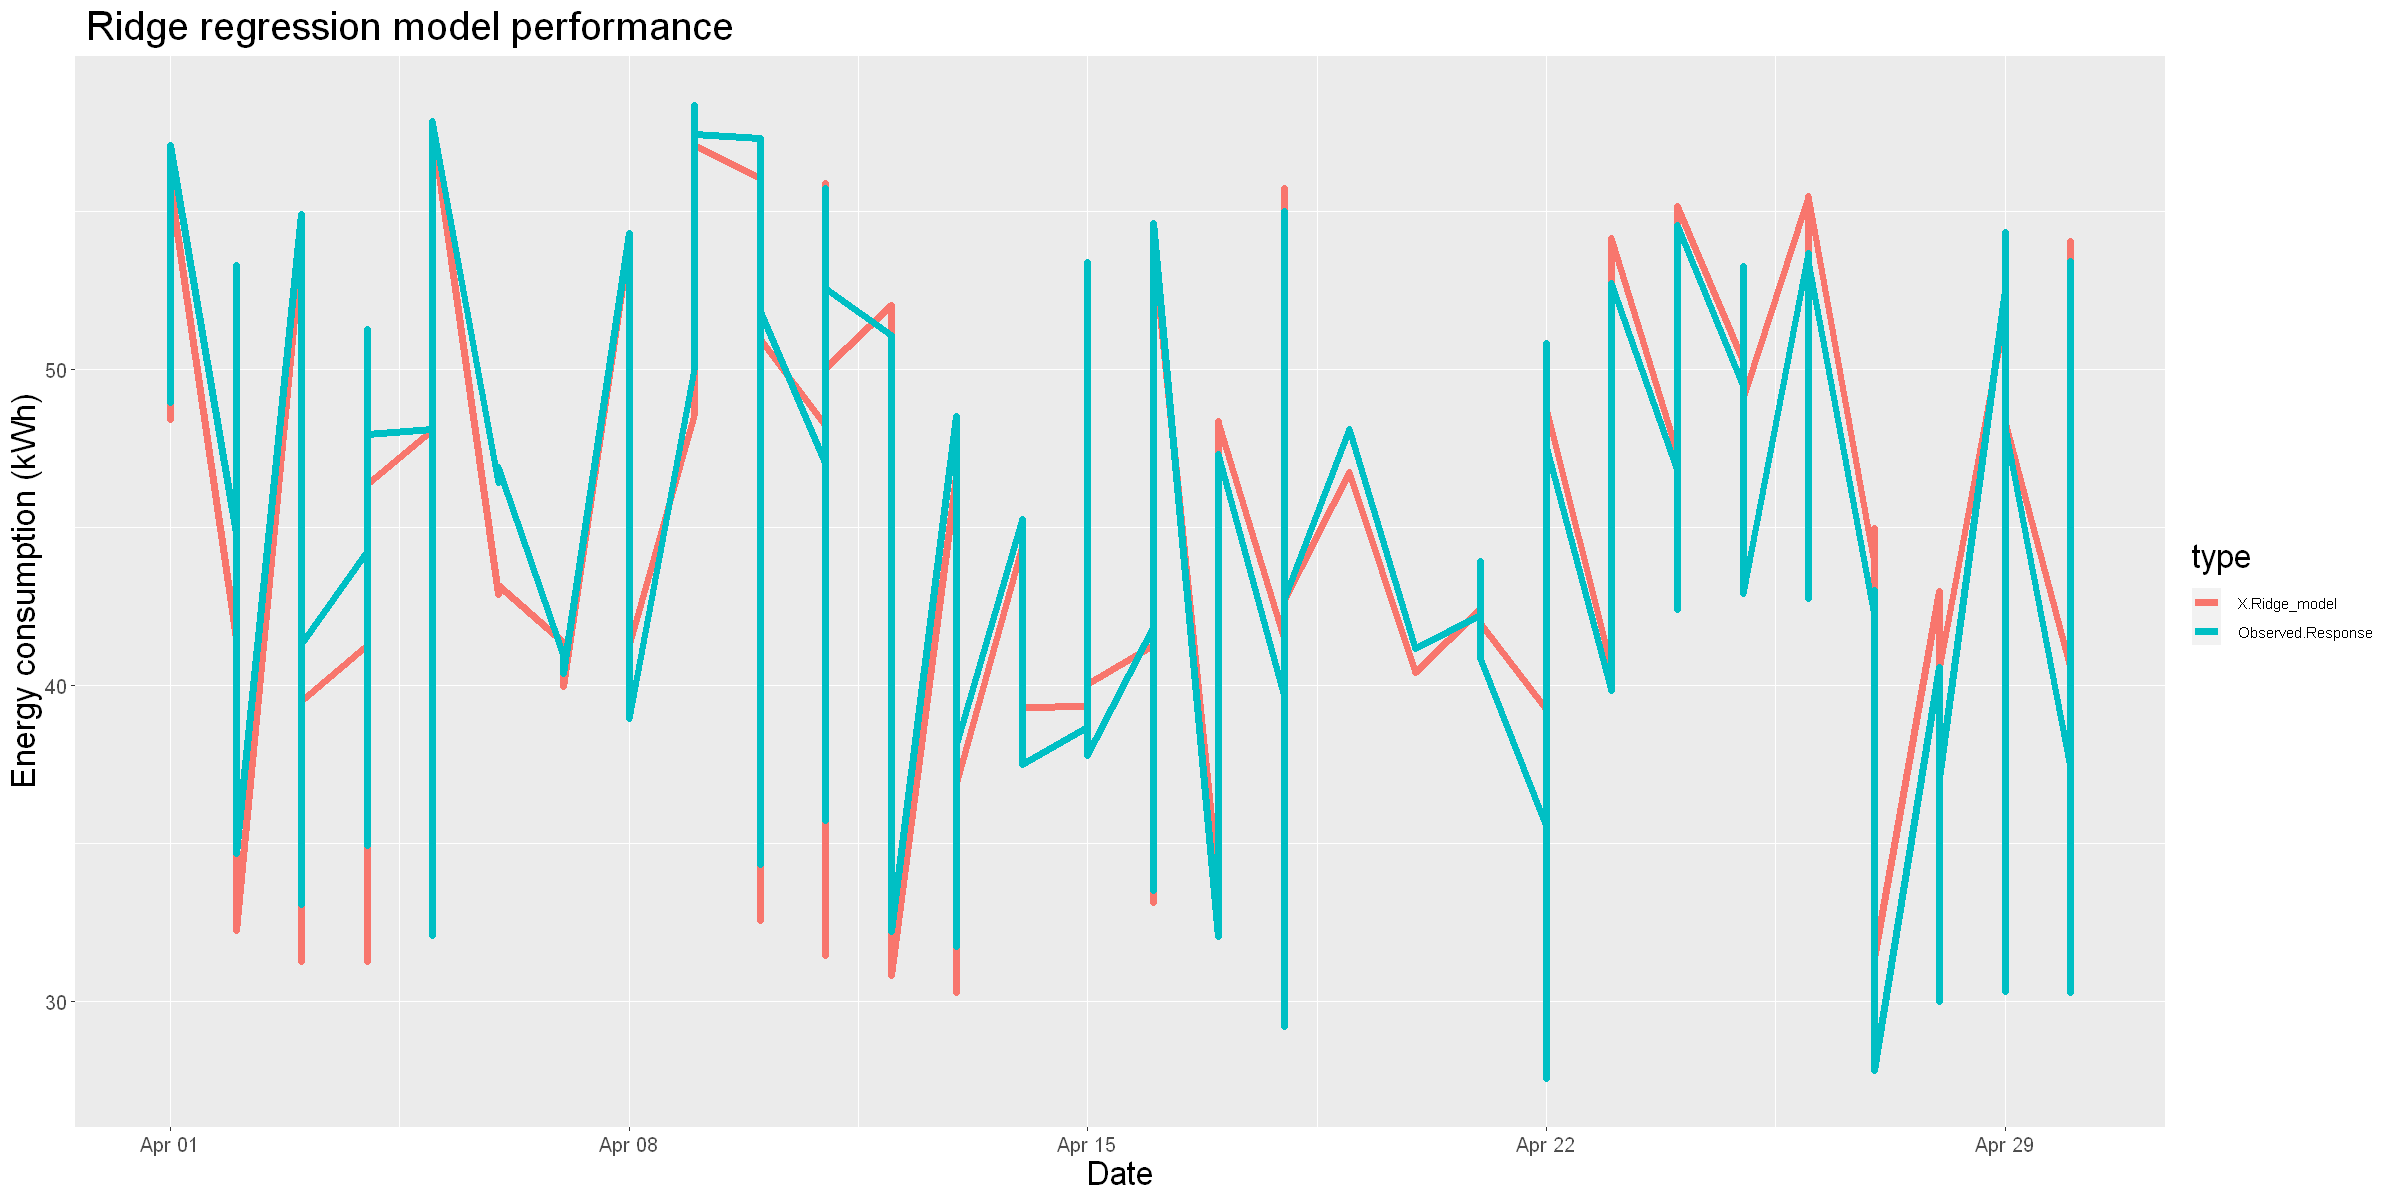

In [93]:
ggplot(test_compare_plot_ridge) + 
 geom_line(aes(x = Date, y = x,color =type,),size = 2,alpha = 1,) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Ridge regression model performance ", y = "Energy consumption (kWh)", x = "Date")

In [80]:
ridge_coe = ridge_result$summaries$summary1$coefficients
ridge_coe = data.frame(ridge_coe)
ridge_coe$variables_name = rownames(ridge_coe)

In [86]:
ridge_result$summaries$summary1

,Estimate,Scaled estimate,Std. Error (scaled),t value (scaled),Pr(>|t|)
(Intercept),3.543916e+01,NA,NA,NA,NA
ridership,1.458015e-05,5.6162563,5.025527,1.1175457,2.637611e-01
avg_interval_speed_mph,-1.231943e-01,-6.9406008,1.909500,3.6347746,2.782238e-04
avg_hour_speed_mph,2.601127e-01,14.8953412,4.231803,3.5198573,4.317790e-04
speed_bin_1_time_hr,1.594596e-02,17.7409510,6.629714,2.6759755,7.451210e-03
speed_bin_2_time_hr,3.143118e-01,55.2260624,6.544468,8.4385865,0.000000e+00
speed_bin_3_time_hr,2.214913e-01,28.0090330,6.972326,4.0171722,5.890067e-05
speed_bin_4_time_hr,-1.182248e-01,-9.5986881,6.584081,1.4578631,1.448783e-01
speed_bin_5_time_hr,5.985253e-01,50.8335617,6.761715,7.5178505,5.573320e-14
accel_bin_1_time_hr,-1.785121e-01,-15.9958619,7.325180,2.1836819,2.898563e-02


Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


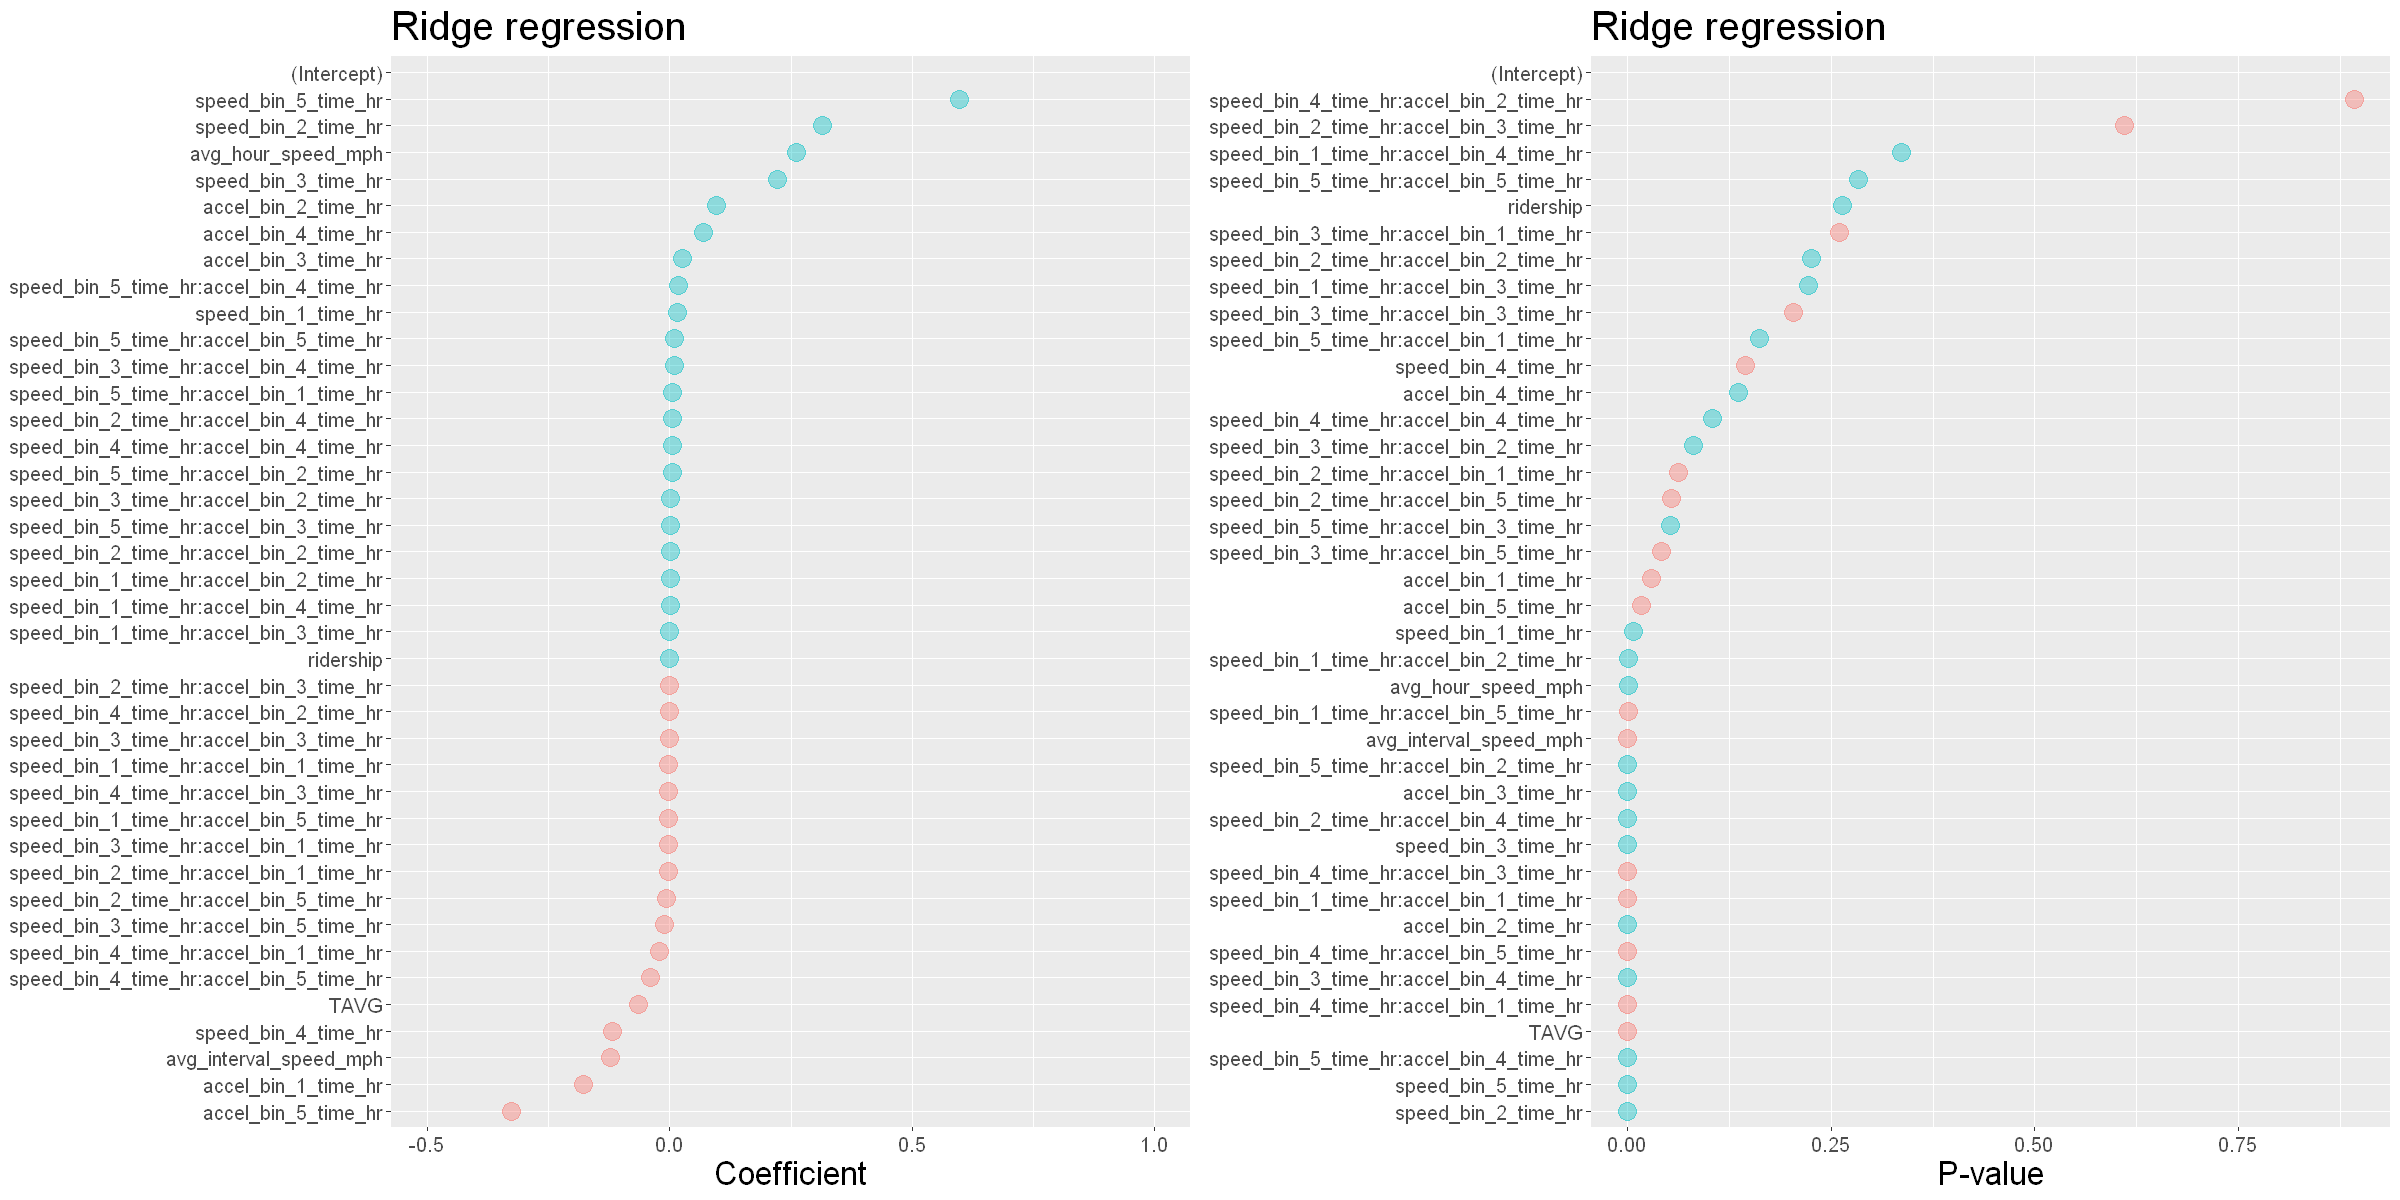

In [85]:
# Plot Ridge regression coef
p1 = ggplot(ridge_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-0.5,1) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Ridge regression") +
  xlab("Coefficient") +
  ylab(NULL)
p2 = ggplot(ridge_coe,aes(Pr...t.., reorder(variables_name,Pr...t..), color = Estimate > 0)) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Ridge regression") +
  xlab("P-value") +
  ylab(NULL)
options(repr.plot.width = 20, repr.plot.height = 10)
grid.arrange(p1, p2,ncol=2, nrow=1)

# lasso regression

In [203]:
x = scale(x, center = TRUE, scale = TRUE)

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


In [196]:
colnames(x)

[1] "distance_mile"                          
 [2] "time_hr"                                
 [3] "speed_bin_1_time_hr"                    
 [4] "speed_bin_2_time_hr"                    
 [5] "speed_bin_3_time_hr"                    
 [6] "speed_bin_4_time_hr"                    
 [7] "speed_bin_5_time_hr"                    
 [8] "speed_bin_6_time_hr"                    
 [9] "speed_bin_7_time_hr"                    
[10] "speed_bin_8_time_hr"                    
[11] "accel_bin_1_time_hr"                    
[12] "accel_bin_2_time_hr"                    
[13] "accel_bin_3_time_hr"                    
[14] "accel_bin_4_time_hr"                    
[15] "accel_bin_5_time_hr"                    
[16] "accel_bin_6_time_hr"                    
[17] "accel_bin_7_time_hr"                    
[18] "accel_bin_8_time_hr"                    
[19] "avg_interval_speed_mph"                 
[20] "avg_hour_speed_mph"                     
[21] "ridership"                              
[22] "TAVG"                                   
[23] "weekend"                                
[24] "speed_bin_1_time_hr_accel_bin_2_time_hr"
[25] "speed_bin_1_time_hr_accel_bin_3_time_hr"
[26] "speed_bin_1_time_hr_accel_bin_4_time_hr"
[27] "speed_bin_1_time_hr_accel_bin_5_time_hr"
[28] "speed_bin_1_time_hr_accel_bin_6_time_hr"
[29] "speed_bin_1_time_hr_accel_bin_7_time_hr"
[30] "speed_bin_1_time_hr_accel_bin_8_time_hr"
[31] "speed_bin_2_time_hr_accel_bin_1_time_hr"
[32] "speed_bin_2_time_hr_accel_bin_3_time_hr"
[33] "speed_bin_2_time_hr_accel_bin_4_time_hr"
[34] "speed_bin_2_time_hr_accel_bin_5_time_hr"
[35] "speed_bin_2_time_hr_accel_bin_6_time_hr"
[36] "speed_bin_2_time_hr_accel_bin_7_time_hr"
[37] "speed_bin_2_time_hr_accel_bin_8_time_hr"
[38] "speed_bin_3_time_hr_accel_bin_1_time_hr"
[39] "speed_bin_3_time_hr_accel_bin_2_time_hr"
[40] "speed_bin_3_time_hr_accel_bin_4_time_hr"
[41] "speed_bin_3_time_hr_accel_bin_5_time_hr"
[42] "speed_bin_3_time_hr_accel_bin_6_time_hr"
[43] "speed_bin_3_time_hr_accel_bin_7_time_hr"
[44] "speed_bin_3_time_hr_accel_bin_8_time_hr"
[45] "speed_bin_4_time_hr_accel_bin_1_time_hr"
[46] "speed_bin_4_time_hr_accel_bin_2_time_hr"
[47] "speed_bin_4_time_hr_accel_bin_3_time_hr"
[48] "speed_bin_4_time_hr_accel_bin_5_time_hr"
[49] "speed_bin_4_time_hr_accel_bin_6_time_hr"
[50] "speed_bin_4_time_hr_accel_bin_7_time_hr"
[51] "speed_bin_4_time_hr_accel_bin_8_time_hr"
[52] "speed_bin_5_time_hr_accel_bin_1_time_hr"
[53] "speed_bin_5_time_hr_accel_bin_2_time_hr"
[54] "speed_bin_5_time_hr_accel_bin_3_time_hr"
[55] "speed_bin_5_time_hr_accel_bin_4_time_hr"
[56] "speed_bin_5_time_hr_accel_bin_6_time_hr"
[57] "speed_bin_5_time_hr_accel_bin_7_time_hr"
[58] "speed_bin_5_time_hr_accel_bin_8_time_hr"
[59] "speed_bin_6_time_hr_accel_bin_1_time_hr"
[60] "speed_bin_6_time_hr_accel_bin_2_time_hr"
[61] "speed_bin_6_time_hr_accel_bin_3_time_hr"
[62] "speed_bin_6_time_hr_accel_bin_4_time_hr"
[63] "speed_bin_6_time_hr_accel_bin_5_time_hr"
[64] "speed_bin_6_time_hr_accel_bin_7_time_hr"
[65] "speed_bin_6_time_hr_accel_bin_8_time_hr"
[66] "speed_bin_7_time_hr_accel_bin_1_time_hr"
[67] "speed_bin_7_time_hr_accel_bin_2_time_hr"
[68] "speed_bin_7_time_hr_accel_bin_3_time_hr"
[69] "speed_bin_7_time_hr_accel_bin_4_time_hr"
[70] "speed_bin_7_time_hr_accel_bin_5_time_hr"
[71] "speed_bin_7_time_hr_accel_bin_6_time_hr"
[72] "speed_bin_7_time_hr_accel_bin_8_time_hr"
[73] "speed_bin_8_time_hr_accel_bin_1_time_hr"
[74] "speed_bin_8_time_hr_accel_bin_2_time_hr"
[75] "speed_bin_8_time_hr_accel_bin_3_time_hr"
[76] "speed_bin_8_time_hr_accel_bin_4_time_hr"
[77] "speed_bin_8_time_hr_accel_bin_5_time_hr"
[78] "speed_bin_8_time_hr_accel_bin_6_time_hr"
[79] "speed_bin_8_time_hr_accel_bin_7_time_hr"

In [195]:
x = x[,-23]

In [201]:
# First line: Min MSE
# Second line: One standard deviation
set.seed(1)
lasso <- cv.glmnet(x, y, alpha = 1, family = 'gaussian')

ERROR: Error in cbind2(1, newx) %*% nbeta: invalid class 'NA' to dup_mMatrix_as_dgeMatrix


In [90]:
lasso$lambda.min

[1] 0.004486842

In [150]:
pred_lasso = predict(fit_cv, s = fit_cv$lambda.min, x_test)

In [152]:
mean((y_test- pred.lasso)^2)

[1] 3.835432

In [153]:
test_compare_lasso = data.frame("Observed Response" = y_test, " Lasso" = pred.lasso)

In [156]:
png("../../figures/Lasso-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare_lasso) + 
 geom_point(aes(x = Observed.Response, y = X1),size = 5,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Lasso Model performance ", y = "Energy consumption (kWh)", x = "Observation")
dev.off()

png 
  2

In [118]:
fit_cv$lambda.min

[1] 0.004663705

In [92]:
get_coe <- function(the_fit,the_lamb){
  Coefficients <- coef(the_fit, s = the_lamb)
  Active.Index <- which(Coefficients != 0)
  Active.Coefficients <- Coefficients[Active.Index]
  re <- data.frame(rownames(Coefficients)[Active.Index],Active.Coefficients)
  re <- data.table('var_names'=rownames(Coefficients)[Active.Index],
                   'coef'=Active.Coefficients)
  re$expcoef <- exp(re$coef)
  return(re[order(expcoef)])
}

In [93]:
Coe = get_coe(lasso,lasso$lambda.min)

In [131]:
library(pheatmap)

Warning message:
"package 'pheatmap' was built under R version 3.6.3"


In [25]:
coe_ma_round = round(coe_ma)

In [316]:
coe_matrix

[[1]]
[1] 0

[[2]]
[1] -0.002144194

[[3]]
[1] 0.002218822

[[4]]
[1] 0

[[5]]
[1] -0.000361878

[[6]]
[1] -0.01967218

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0.04838129

[[10]]
[1] 0

[[11]]
[1] -0.01968713

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0.02629548

[[15]]
[1] 0

[[16]]
[1] 0

[[17]]
[1] 0

[[18]]
[1] 0

[[19]]
[1] 0

[[20]]
[1] 0

[[21]]
[1] 0.01081929

[[22]]
[1] 0

[[23]]
[1] 0

[[24]]
[1] -0.1647295

[[25]]
[1] 0

[[26]]
[1] 0

[[27]]
[1] 0

[[28]]
[1] 0

[[29]]
[1] 0

[[30]]
[1] 0.08254293

[[31]]
[1] 0

[[32]]
[1] -0.2230894

[[33]]
[1] 0.03050894

[[34]]
[1] 0

[[35]]
[1] 0

[[36]]
[1] -0.00880332

[[37]]
[1] 0

[[38]]
[1] 0.1299848

[[39]]
[1] 0

[[40]]
[1] 0

[[41]]
[1] 0

[[42]]
[1] 0

[[43]]
[1] 0

[[44]]
[1] 0

[[45]]
[1] 0

[[46]]
[1] 0

[[47]]
[1] 0

[[48]]
[1] 0.006284996

[[49]]
[1] 0

[[50]]
[1] 0

[[51]]
[1] -0.09287017

[[52]]
[1] 0

[[53]]
[1] 0

[[54]]
[1] 0

[[55]]
[1] 0

[[56]]
[1] 0.6976968

[[57]]
[1] -0.4424494

[[58]]
[1] 0

[[59]]
[1] 0

[[60]]
[1] 0.03210323

[[61]]
[1] 0

[[62]]
[1] 0.09010955

[[63]]
[1] 0

[[64]]
[1] 0

$ID
[1] "accel_bin_1" "accel_bin_2" "accel_bin_3" "accel_bin_4" "accel_bin_5"
[6] "accel_bin_6" "accel_bin_7" "accel_bin_8"

In [315]:
coe_matrix$ID = rownames(coe_matrix)

Warning message in coe_matrix$ID = rownames(coe_matrix):
"Coercing LHS to a list"


In [307]:
data_coe$value = as.numeric(data_coe$value)

In [71]:
data_coe <- melt(coe_matrix, id.vars=c("X"))

Warning message in melt(coe_matrix, id.vars = c("X")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(coe_matrix). In the next version, this warning will become an error."


In [303]:
data_coe

X,variable,value
<fct>,<fct>,<dbl>
accel_bin_1,speed_bin_1,0.00
accel_bin_2,speed_bin_1,0.00
accel_bin_3,speed_bin_1,0.00
accel_bin_4,speed_bin_1,0.00
accel_bin_5,speed_bin_1,0.00
accel_bin_6,speed_bin_1,-0.02
accel_bin_7,speed_bin_1,0.00
accel_bin_8,speed_bin_1,0.00
acceleration,speed_bin_1,1.57


In [94]:
colors <-  rainbow(5, alpha=0.4)

In [96]:
options(repr.plot.width = 10, repr.plot.height = 10)
png("../../figures/HEAT.png",height=5000,width=5000,res=360)
ggplot(data_coe, aes(x=variable,y=X)) + geom_tile(aes(fill=value)) + 
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),title= element_text(size = 20),
        axis.text.x = element_text(size = 15),
          axis.text.y = element_text(size = 15),
      legend.title = element_text(size = 20),
      legend.text = element_text(size = 15),
       axis.title.y = element_blank()) +
     scale_fill_gradientn(colours = colors)
    # scale_fill_gradient2(low="#00AFBB", high="#FC4E07",mid ="#E7B800" )
 dev.off()

png 
  2

In [ ]:
data$ID <- rownames(data)

In [70]:
coe_matrix

X,speed_bin_1,speed_bin_2,speed_bin_3,speed_bin_4,speed_bin_5,speed_bin_6,speed_bin_7,speed_bin_8
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
accel_bin_1,0.000000000,0.04838129,0.00000000,0.00000000,0.03050894,0.000000000,0.00000000,-0.44244944
accel_bin_2,-0.002144194,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000
accel_bin_3,0.002218822,-0.01968713,0.00000000,0.00000000,0.00000000,0.000000000,-0.09287017,0.00000000
accel_bin_4,0.000000000,0.00000000,0.00000000,0.00000000,-0.00880332,0.000000000,0.00000000,0.03210323
accel_bin_5,-0.000361878,0.00000000,0.01081929,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000
accel_bin_6,-0.019672180,0.02629548,0.00000000,0.08254293,0.12998477,0.000000000,0.00000000,0.09010955
accel_bin_7,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000
accel_bin_8,0.000000000,0.00000000,-0.16472949,-0.22308938,0.00000000,0.006284996,0.69769682,0.00000000


In [69]:
coe_matrix = read.csv("../../figures/lasso_coe_matrix.csv")

In [132]:
# heat map
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(coe_matrix, aes(x=variable,y=ID)) + geom_tile(aes(fill=value)) +
scale_fill_gradient(low = "white", high = "red")

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not a numeric vector


In [309]:
fix(coe_matrix)

In [313]:
write.csv(coe_matrix,file="../../figures/lasso_coe_matrix.csv")

In [287]:
coe_matrix = matrix(0,8,8)

In [312]:
fix(coe_matrix)

In [311]:
coe_matrix = matrix(0,8,8)
row = c("accel_bin_1","accel_bin_2","accel_bin_3","accel_bin_4","accel_bin_5","accel_bin_6","accel_bin_7","accel_bin_8")
column = c("speed_bin_1","speed_bin_2","speed_bin_3","speed_bin_4","speed_bin_5","speed_bin_6","speed_bin_7","speed_bin_8")
dimnames(coe_matrix)=list(row,column)

In [95]:
ggplot(linear_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-5,5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)

[1] "speed_bin_1_time_hr_accel_bin_2_time_hr"
 [2] "speed_bin_6_time_hr_accel_bin_8_time_hr"
 [3] "TAVG"                                   
 [4] "speed_bin_7_time_hr_accel_bin_8_time_hr"
 [5] "accel_bin_8_time_hr"                    
 [6] "speed_bin_1_time_hr_accel_bin_6_time_hr"
 [7] "speed_bin_3_time_hr_accel_bin_8_time_hr"
 [8] "avg_interval_speed_mph"                 
 [9] "speed_bin_4_time_hr_accel_bin_8_time_hr"
[10] "speed_bin_1_time_hr_accel_bin_3_time_hr"
[11] "speed_bin_1_time_hr_accel_bin_5_time_hr"
[12] "speed_bin_5_time_hr_accel_bin_4_time_hr"
[13] "speed_bin_2_time_hr_accel_bin_3_time_hr"
[14] "speed_bin_7_time_hr_accel_bin_3_time_hr"
[15] "speed_bin_5_time_hr_accel_bin_1_time_hr"
[16] "speed_bin_8_time_hr_accel_bin_4_time_hr"
[17] "speed_bin_8_time_hr"                    
[18] "speed_bin_8_time_hr_accel_bin_1_time_hr"
[19] "speed_bin_2_time_hr_accel_bin_1_time_hr"
[20] "speed_bin_2_time_hr_accel_bin_6_time_hr"
[21] "speed_bin_5_time_hr"                    
[22] "accel_bin_7_time_hr"                    
[23] "accel_bin_1_time_hr"                    
[24] "speed_bin_1_time_hr"                    
[25] "distance_mile"                          
[26] "speed_bin_4_time_hr_accel_bin_6_time_hr"
[27] "speed_bin_3_time_hr_accel_bin_5_time_hr"
[28] "speed_bin_5_time_hr_accel_bin_6_time_hr"
[29] "ridership"                              
[30] "avg_hour_speed_mph"                     
[31] "speed_bin_8_time_hr_accel_bin_6_time_hr"
[32] "accel_bin_4_time_hr"                    
[33] "accel_bin_3_time_hr"                    
[34] "accel_bin_6_time_hr"                    
[35] "(Intercept)"

In [48]:
head(dfh_train$weekends_weekday)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,speed_bin_7_time_hr_accel_bin_5_time_hr,speed_bin_7_time_hr_accel_bin_6_time_hr,speed_bin_7_time_hr_accel_bin_8_time_hr,speed_bin_8_time_hr_accel_bin_1_time_hr,speed_bin_8_time_hr_accel_bin_2_time_hr,speed_bin_8_time_hr_accel_bin_3_time_hr,speed_bin_8_time_hr_accel_bin_4_time_hr,speed_bin_8_time_hr_accel_bin_5_time_hr,speed_bin_8_time_hr_accel_bin_6_time_hr,speed_bin_8_time_hr_accel_bin_7_time_hr
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,2019,4,1,10,1792.540,244.4475,117.0064,57.09028,17.18444,...,538.0111,140.8122,42.81273,43.79435,137.37413,234.2842,812.3110,430.0873,112.56562,47.86349
7,7,2019,4,1,11,1655.929,245.9167,124.8353,55.15056,17.76306,...,765.6622,101.7049,29.38000,26.08921,100.32943,165.6372,456.8171,601.2718,79.86852,32.52467
8,8,2019,4,1,12,1558.590,241.7983,130.5450,51.00083,14.93667,...,631.1546,116.5103,35.92609,28.26860,97.41726,157.6867,611.2033,426.7349,78.77468,33.13101
9,9,2019,4,1,13,1483.327,223.1367,121.0853,44.08194,14.03083,...,481.7570,105.9992,29.45854,24.46204,97.08257,152.6723,542.0570,344.8986,75.88673,31.14693
10,10,2019,4,1,14,1593.426,240.4753,126.0211,55.03500,13.36694,...,462.7518,125.3851,33.85671,30.01267,115.35373,202.2002,757.4092,361.2661,97.88696,38.52589
11,11,2019,4,1,15,1868.968,266.9275,136.6403,60.71556,14.16000,...,585.2764,182.8144,49.33062,39.00389,155.25985,280.2483,1049.6265,420.8969,131.46951,55.76722


In [59]:
lasso_model = lm(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         speed_bin_1_time_hr_accel_bin_2_time_hr + speed_bin_6_time_hr_accel_bin_8_time_hr +
                         speed_bin_7_time_hr_accel_bin_8_time_hr + accel_bin_8_time_hr + speed_bin_1_time_hr_accel_bin_6_time_hr +
                         speed_bin_3_time_hr_accel_bin_8_time_hr + speed_bin_4_time_hr_accel_bin_8_time_hr + speed_bin_1_time_hr_accel_bin_3_time_hr +
                         speed_bin_1_time_hr_accel_bin_5_time_hr + speed_bin_5_time_hr_accel_bin_4_time_hr + speed_bin_2_time_hr_accel_bin_3_time_hr +
                         speed_bin_7_time_hr_accel_bin_3_time_hr + speed_bin_5_time_hr_accel_bin_1_time_hr + speed_bin_8_time_hr_accel_bin_4_time_hr +
                         speed_bin_8_time_hr + speed_bin_8_time_hr_accel_bin_1_time_hr + speed_bin_2_time_hr_accel_bin_1_time_hr + speed_bin_2_time_hr_accel_bin_6_time_hr +
                         speed_bin_5_time_hr + accel_bin_7_time_hr + accel_bin_1_time_hr + speed_bin_1_time_hr + distance_mile + speed_bin_4_time_hr_accel_bin_6_time_hr +
                         speed_bin_3_time_hr_accel_bin_5_time_hr + speed_bin_5_time_hr_accel_bin_6_time_hr + speed_bin_8_time_hr_accel_bin_6_time_hr + accel_bin_4_time_hr +
                         accel_bin_3_time_hr + accel_bin_6_time_hr +
                         weekends_weekday + 
                         TAVG,data = dfh_train) #select=TRUE weekends_weekday)

In [60]:
summary(lasso_model)


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_1_time_hr_accel_bin_2_time_hr + 
    speed_bin_6_time_hr_accel_bin_8_time_hr + speed_bin_7_time_hr_accel_bin_8_time_hr + 
    accel_bin_8_time_hr + speed_bin_1_time_hr_accel_bin_6_time_hr + 
    speed_bin_3_time_hr_accel_bin_8_time_hr + speed_bin_4_time_hr_accel_bin_8_time_hr + 
    speed_bin_1_time_hr_accel_bin_3_time_hr + speed_bin_1_time_hr_accel_bin_5_time_hr + 
    speed_bin_5_time_hr_accel_bin_4_time_hr + speed_bin_2_time_hr_accel_bin_3_time_hr + 
    speed_bin_7_time_hr_accel_bin_3_time_hr + speed_bin_5_time_hr_accel_bin_1_time_hr + 
    speed_bin_8_time_hr_accel_bin_4_time_hr + speed_bin_8_time_hr + 
    speed_bin_8_time_hr_accel_bin_1_time_hr + speed_bin_2_time_hr_accel_bin_1_time_hr + 
    speed_bin_2_time_hr_accel_bin_6_time_hr + speed_bin_5_time_hr + 
    accel_bin_7_time_hr + accel_bin_1_time_hr + speed_bin_1_time_hr + 
    distance_mile + speed_bin_4_time_hr_accel_bin

In [61]:
pred_lasso <- predict.lm(lasso_model, dfh_test)

In [62]:
pred_lasso_1 <- predict.lm(lasso_model, dfh_train)

In [63]:
test_compare = data.frame("Observed" = dfh_train$energy_kwh, " Predicted" = pred_lasso_1,
                          "Hour" = dfh_train$hour,"Year" = dfh_train$year,"Day"  = dfh_train$day,"Month" = dfh_train$month)
test_compare$Date = with(test_compare, ISOdatetime(Year,  Month, Day, Hour, 0, 0))
colnames(test_compare)[2] <- 'Predicted'
test_compare_plot_lasso = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("Predicted","Observed"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


In [67]:
test_compare = data.frame("Observed" = dfh_test$energy_kwh, " Predicted" = pred_lasso,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = with(test_compare, ISOdatetime(Year,  Month, Day, Hour, 0, 0))
colnames(test_compare)[2] <- 'Predicted'
test_compare_plot_lasso = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("Predicted","Observed"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


In [346]:
test_compare_plot_lasso = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("Lasso_model","Observed.Response"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


In [68]:
png("../../figures/lasso performance train.png",height=4000,width=9000,res=360)
ggplot(test_compare_plot_lasso) + 
 geom_line(aes(x = Date, y = x,color = type,),size = 1,alpha = 1,) +
 theme(axis.text=element_text(size = 25),axis.title.x = element_text(size = 30),axis.title.y = element_text(size = 30),title= element_blank(),
       legend.text = element_text(size = 25))+
 labs(title =" Lasso model performance", y = "Energy consumption (MWh)", x = "Date", color = "Model") 
dev.off()

png 
  2

In [359]:
lasso_model_1= lm(energy_kwh ~ log(ridership) + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         accel_bin_3_time_hr +
                          speed_bin_8_time_hr +
                         speed_bin_3_time_hr +
                          accel_bin_4_time_hr +
                          accel_bin_8_time_hr +
                          speed_bin_7_time_hr +
                          accel_bin_6_time_hr +
                          accel_bin_5_time_hr +
                         speed_bin_8_time_hr*accel_bin_4_time_hr +
                         #speed_bin_7_time_hr_accel_bin_8_time_hr + 
                         speed_bin_7_time_hr*accel_bin_3_time_hr + 
                         speed_bin_1_time_hr +
                         speed_bin_3_time_hr_accel_bin_8_time_hr +
                         speed_bin_1_time_hr + 
                         speed_bin_1_time_hr*accel_bin_6_time_hr + 
                         speed_bin_3_time_hr*accel_bin_5_time_hr +
                          weekend + TAVG +
                         I(TAVG^2),data = dfh_train) #select=TRUE weekends_weekday)

In [360]:
summary(lasso_model_1)


Call:
lm(formula = energy_kwh ~ log(ridership) + avg_interval_speed_mph + 
    avg_hour_speed_mph + accel_bin_3_time_hr + speed_bin_8_time_hr + 
    speed_bin_3_time_hr + accel_bin_4_time_hr + accel_bin_8_time_hr + 
    speed_bin_7_time_hr + accel_bin_6_time_hr + accel_bin_5_time_hr + 
    speed_bin_8_time_hr * accel_bin_4_time_hr + speed_bin_7_time_hr * 
    accel_bin_3_time_hr + speed_bin_1_time_hr + speed_bin_3_time_hr_accel_bin_8_time_hr + 
    speed_bin_1_time_hr + speed_bin_1_time_hr * accel_bin_6_time_hr + 
    speed_bin_3_time_hr * accel_bin_5_time_hr + weekend + TAVG + 
    I(TAVG^2), data = dfh_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8072 -1.0226 -0.1361  0.9048 11.1349 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             61.1251211  2.7354789  22.345  < 2e-16
log(ridership)                           0.3137166  0.1096068   2.862 0.004386
avg_interval_speed_mph            

In [242]:
lasso_result = summary(lasso_model)

In [292]:
lasso_coe

,Estimate,Std..Error,t.value,Pr...t..,variables_name
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),3.782372e+01,0.9242304886,40.92455144,1.789221e-158,(Intercept)
ridership,8.044096e-05,0.0000158666,5.06983108,5.699590e-07,ridership
avg_interval_speed_mph,-1.425854e-01,0.0412158233,-3.45948271,5.895633e-04,avg_interval_speed_mph
avg_hour_speed_mph,5.197301e-01,0.0752786224,6.90408652,1.611156e-11,avg_hour_speed_mph
speed_bin_1_time_hr_accel_bin_2_time_hr,-2.144194e-03,0.0026031142,-0.82370351,4.105180e-01,speed_bin_1_time_hr_accel_bin_2_time_hr
speed_bin_6_time_hr_accel_bin_8_time_hr,6.284996e-03,0.1759278952,0.03572484,9.715166e-01,speed_bin_6_time_hr_accel_bin_8_time_hr
speed_bin_7_time_hr_accel_bin_8_time_hr,6.976968e-01,0.3972328023,1.75639277,7.966036e-02,speed_bin_7_time_hr_accel_bin_8_time_hr
accel_bin_8_time_hr,-5.948402e+00,2.5634777581,-2.32044240,2.073614e-02,accel_bin_8_time_hr
speed_bin_1_time_hr_accel_bin_6_time_hr,-1.967218e-02,0.0082907146,-2.37279663,1.804785e-02,speed_bin_1_time_hr_accel_bin_6_time_hr


In [101]:
# Linear model prediction
pred_lasso <- predict.lm(lasso_model, dfh_test)

In [351]:
lasso_coe = lasso_result$coefficients
lasso_coe = data.frame(lasso_coe)
lasso_coe$variables_name = rownames(lasso_coe)

In [358]:
png("../../figures/lass-coe.png",height=8000,width=8500,res=360)
ggplot(lasso_coe,aes(Estimate, reorder(variables_name,Estimate), color = Pr...t..)) +
   xlim(-6,6) +
  geom_point(size = 10,alpha = 0.4) +
  theme(axis.text=element_text(size = 35),axis.title.x = element_text(size = 40),axis.title.y = element_text(size = 40),title= element_text(size = 40),
        legend.text = element_text(size = 35)) +
  scale_color_gradient(low="blue",high = "red") +
  labs(title = "Lasso regression", x = "Coefficient", y = NULL , color = "P value")+
   guides(color = guide_legend(override.aes = list(size = 3.5)))
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

In [115]:
write.csv(lasso_coe,file = "../../figures/lasso_coe.csv")

In [118]:
# Plot Lasso regression coef
p1 = ggplot(lasso_coe,aes(Estimate, reorder(variables_name,Estimate), color = Estimate > 0)) +
  xlim(-2.5,2.5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Lasso regression") +
  xlab("Coefficient") +
  ylab(NULL)
p2 = ggplot(lasso_coe,aes(Pr...t.., reorder(variables_name,Pr...t..), color = Estimate > 0)) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Lasso regression") +
  xlab("P-value") +
  ylab(NULL)
# options(repr.plot.width = 20, repr.plot.height = 10)
png("../../figures/lass-coe-p.png",height=5000,width=7500,res=360)
grid.arrange(p1, p2,ncol=2, nrow=1)
dev.off()

Warning message:
"Removed 2 rows containing missing values (geom_point)."


png 
  2

In [132]:
summary(lasso_model)


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_2_time_hr + speed_bin_3_time_hr + 
    speed_bin_4_time_hr + speed_bin_5_time_hr + accel_bin_1_time_hr + 
    accel_bin_2_time_hr + accel_bin_3_time_hr + accel_bin_4_time_hr + 
    accel_bin_5_time_hr + speed_bin_1_time_hr * accel_bin_1_time_hr + 
    speed_bin_1_time_hr * accel_bin_2_time_hr + speed_bin_1_time_hr * 
    accel_bin_3_time_hr + speed_bin_1_time_hr * accel_bin_5_time_hr + 
    speed_bin_2_time_hr * accel_bin_1_time_hr + speed_bin_2_time_hr * 
    accel_bin_3_time_hr + speed_bin_2_time_hr * accel_bin_5_time_hr + 
    speed_bin_3_time_hr * accel_bin_4_time_hr + speed_bin_4_time_hr * 
    accel_bin_1_time_hr + speed_bin_4_time_hr * accel_bin_3_time_hr + 
    speed_bin_4_time_hr * accel_bin_4_time_hr + speed_bin_5_time_hr * 
    accel_bin_3_time_hr + speed_bin_5_time_hr * accel_bin_4_time_hr + 
    TAVG, data = dfh_train)

Residuals:
    Min      1Q  Median      3Q     Ma

In [143]:
test_compare_ridge$lasso = pred_lasso

In [146]:
test_compare_plot_lasso = melt(test_compare_ridge,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("Observed.Response","lasso"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare_ridge, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare_ridge). In the next version, this warning will become an error."


In [148]:
test_compare_plot_lasso_ridge =  melt(test_compare_ridge,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Ridge_model","lasso"),variable.name = "type",value.name = "x")

Warning message in melt(test_compare_ridge, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare_ridge). In the next version, this warning will become an error."


In [113]:
test_compare_plot_lasso

Hour,Year,Day,Month,Time,type,x
<int>,<int>,<int>,<int>,<dttm>,<fct>,<dbl>
0,2019,24,4,NA,X.Lasso_model,40.42853
1,2019,24,4,NA,X.Lasso_model,34.09059
10,2019,24,4,NA,X.Lasso_model,50.11020
11,2019,24,4,NA,X.Lasso_model,47.81458
12,2019,24,4,NA,X.Lasso_model,46.57934
13,2019,24,4,NA,X.Lasso_model,47.26748
14,2019,24,4,NA,X.Lasso_model,49.06986
15,2019,24,4,NA,X.Lasso_model,53.17237
16,2019,24,4,NA,X.Lasso_model,53.84802


In [344]:
png("../../figures/lasso performance.png",height=2000,width=5000,res=360)
ggplot(test_compare_plot_lasso) + 
 geom_line(aes(x = Date, y = x,color = type,),size = 1,alpha = 1,) +
 theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_blank())+
 labs(title =" Lasso model performance", y = "Energy consumption (kWh)", x = "Date", color = "Model") 
dev.off()

png 
  2

In [140]:
png("../../figures/lasso coefficient.png",height=4000,width=4000,res=360)
ggplot(Coe,aes(coef, reorder(var_names,coef), color = coef > 0)) +
   xlim(-5, 5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

In [126]:
coef(fit_cv, s = "lambda.1se") %>%
  #tidy() %>%
  #filter(row != "(Intercept)") %>%
  ggplot(aes(value, reorder(row, value), color = value > 0)) +
  geom_point(show.legend = FALSE) +
  ggtitle("Influential variables") +
  xlab("Coefficient") +
  ylab(NULL)

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S4 object with class dgCMatrix


In [97]:
get_plot<- function(the_fit_cv,the_lamb,toplot = seq(1,50,2)){
    Coefficients <- coef(the_fit_cv, s = the_lamb)
    Active.Index <- which(Coefficients != 0)
    coeall <- coef(the_fit_cv, s = the_fit_cv$lambda[toplot])
    coe <- coeall[Active.Index[-1],]
    ylims=c(-max(abs(coe)),max(abs(coe)))
    sp <- spline(log(the_fit_cv$lambda[toplot]),coe[1,],n=100)
    plot(sp,type='l',col =1,lty=1, 
         ylim = ylims,ylab = 'Coefficient', xlab = 'log(lambda)') 
    abline(h=0) 
    for(i in c(2:nrow(coe))){
        lines(spline(log(the_fit_cv$lambda[toplot]),coe[i,],n=1000),
              col =i,lty=i)
    }
    legend("bottomright",legend=rownames(coe),col=c(1:nrow(coe)),
           lty=c(1:nrow(coe)),
           cex=0.5)
}

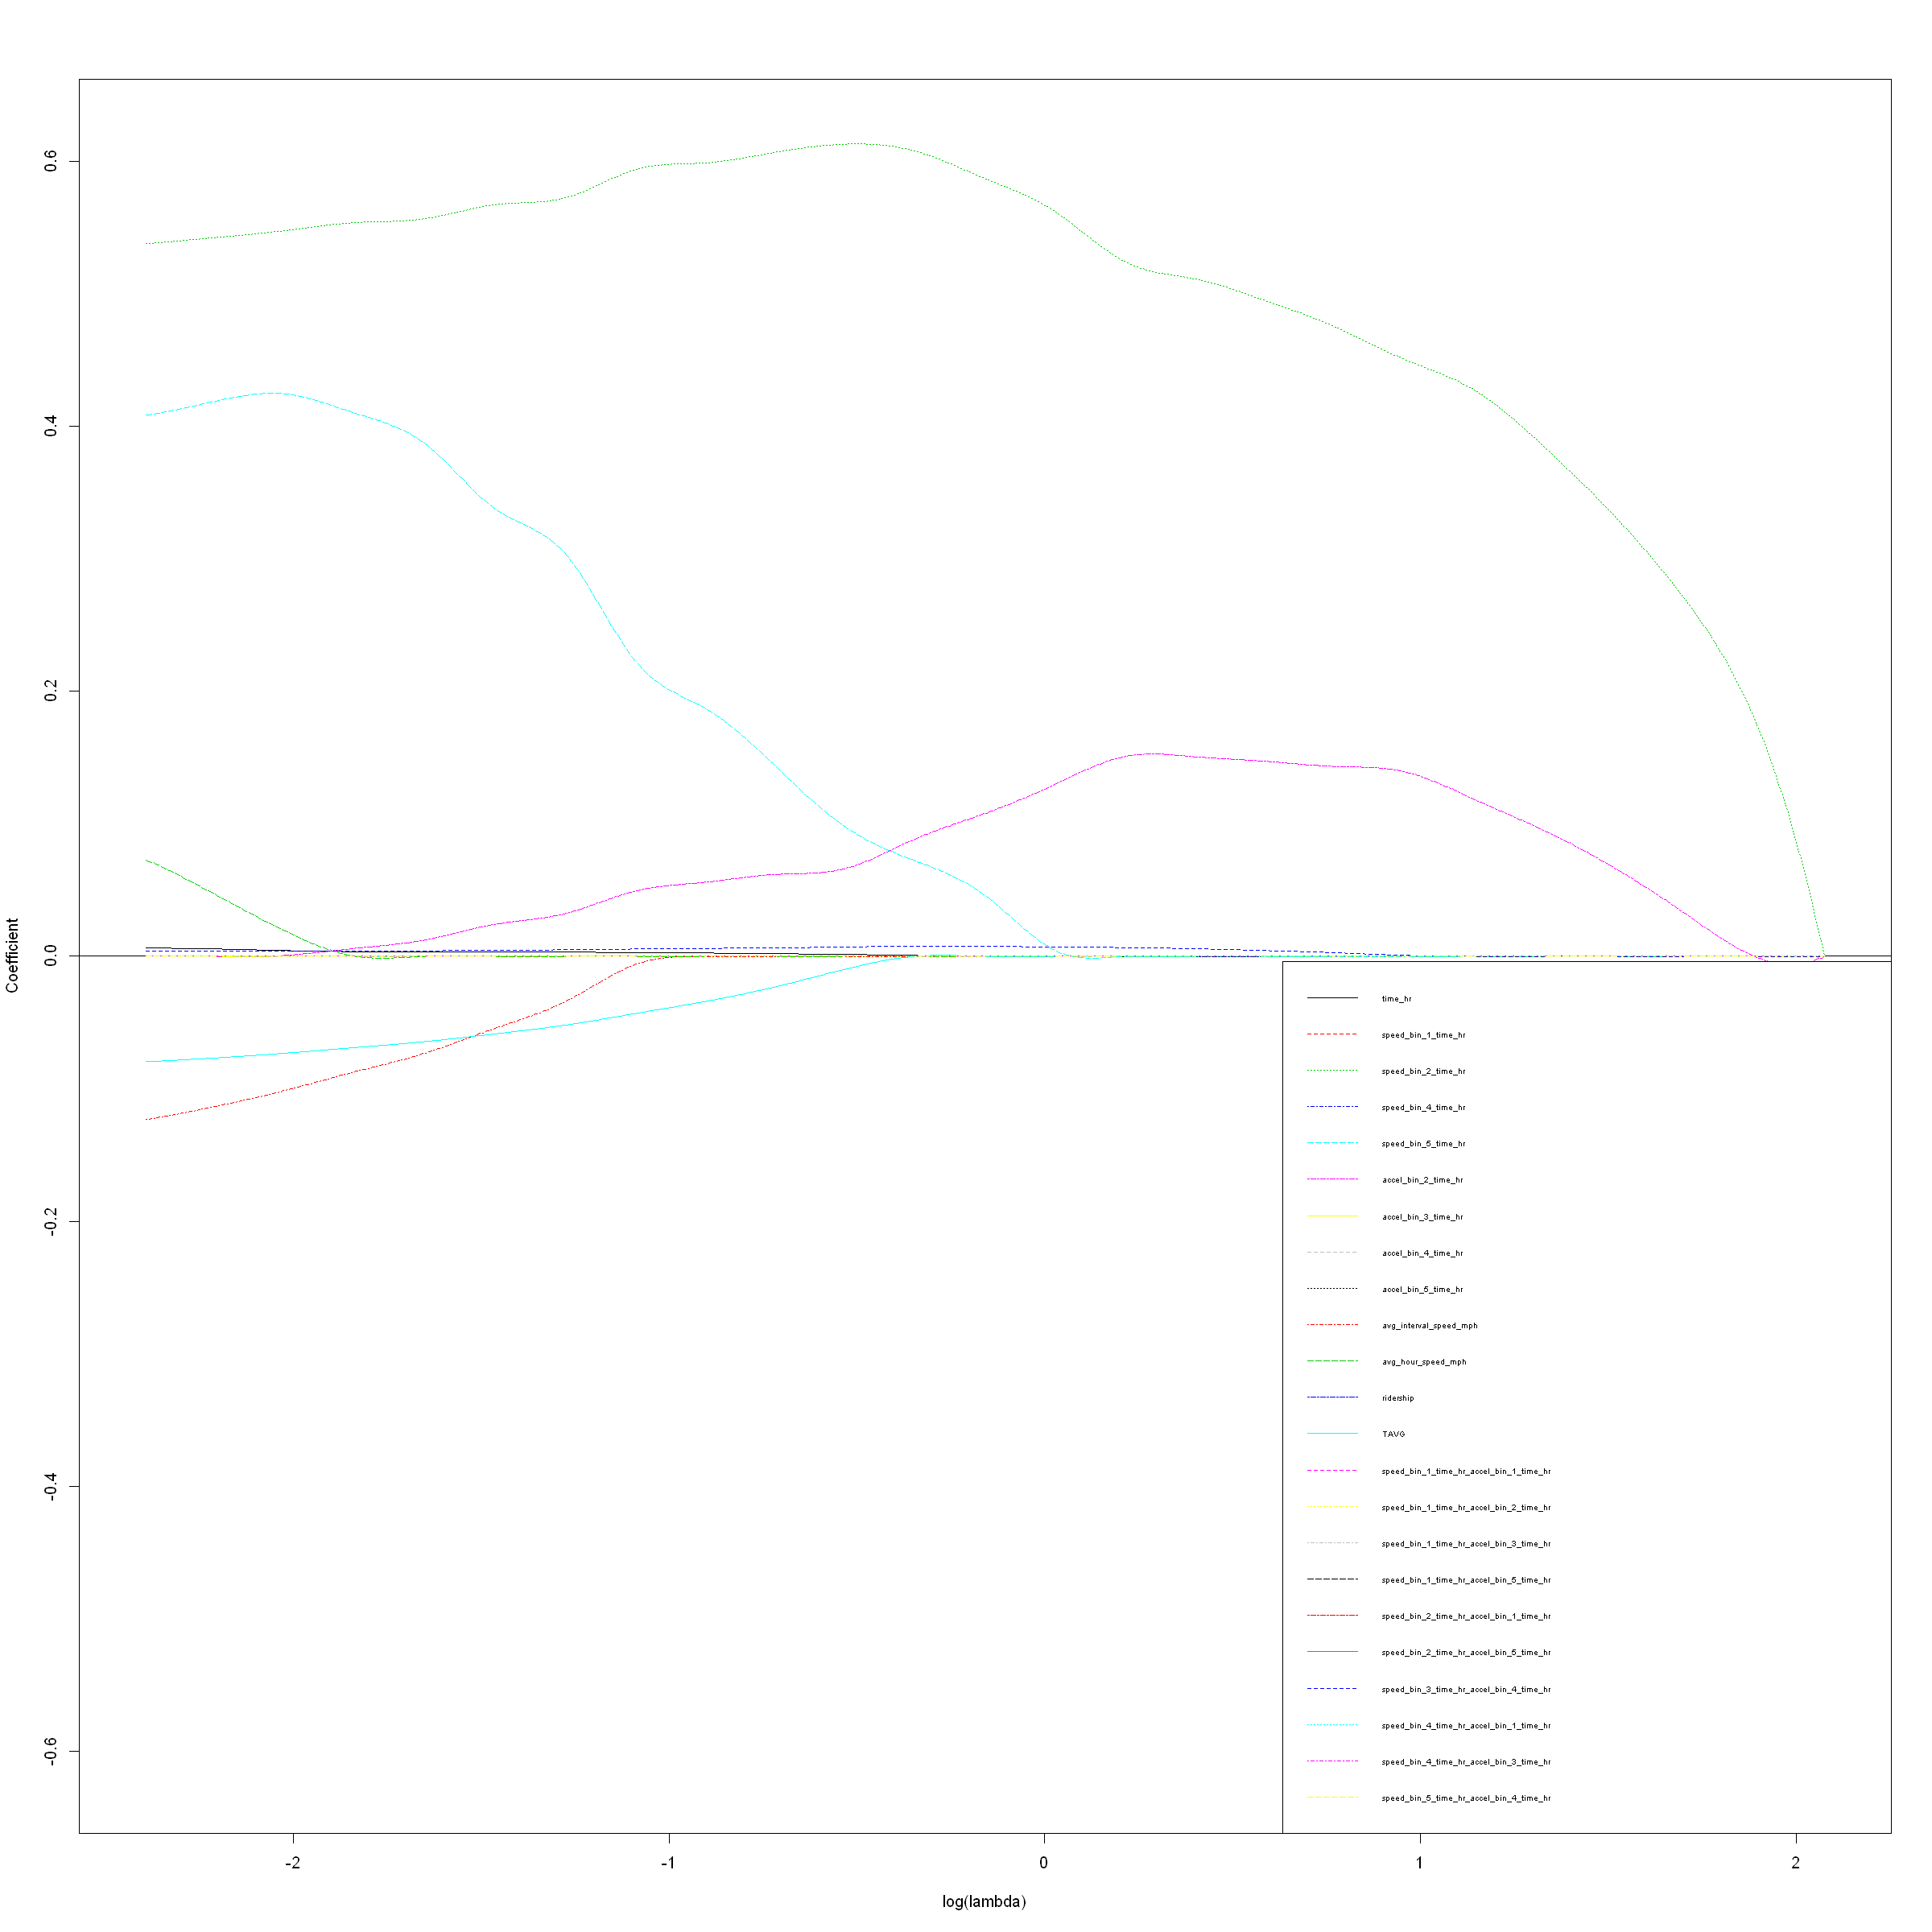

In [103]:
options(repr.plot.width = 20, repr.plot.height = 20)
get_plot(fit_cv,exp(log(fit_cv$lambda.min)-1))

In [83]:
coef <- coef.lars(lar,mode="step",s = 51) #s = step+1
coef[coef!=0]

speed_bin_2_time_hr                     speed_bin_3_time_hr 
                           1.411368e+00                           -2.432262e-01 
                    speed_bin_4_time_hr                     speed_bin_5_time_hr 
                          -1.123114e+00                            1.483775e+00 
                    accel_bin_1_time_hr                     accel_bin_2_time_hr 
                           1.072137e+00                            7.954892e-01 
                    accel_bin_3_time_hr                     accel_bin_4_time_hr 
                           9.423048e-02                           -2.072694e+00 
                    accel_bin_5_time_hr                  avg_interval_speed_mph 
                          -3.835002e+00                           -1.620148e-01 
                     avg_hour_speed_mph                               ridership 
                           3.340336e-01                            4.821247e-06 
                                   TAVG speed_bin_1_time_hr_accel_bin_2_time_hr 
                          -6.662678e-02                            4.713347e-03 
speed_bin_1_time_hr_accel_bin_3_time_hr speed_bin_1_time_hr_accel_bin_4_time_hr 
                           1.944284e-05                           -4.087787e-03 
speed_bin_1_time_hr_accel_bin_5_time_hr speed_bin_2_time_hr_accel_bin_1_time_hr 
                          -1.319466e-02                           -9.367552e-02 
speed_bin_2_time_hr_accel_bin_3_time_hr speed_bin_3_time_hr_accel_bin_2_time_hr 
                          -6.623792e-04                           -4.266731e-02 
speed_bin_3_time_hr_accel_bin_3_time_hr speed_bin_3_time_hr_accel_bin_4_time_hr 
                          -1.462926e-03                            1.375742e-01 
speed_bin_4_time_hr_accel_bin_3_time_hr speed_bin_4_time_hr_accel_bin_4_time_hr 
                          -8.919299e-03                            9.162711e-02 
speed_bin_4_time_hr_accel_bin_5_time_hr speed_bin_5_time_hr_accel_bin_2_time_hr 
                           2.972738e-01                           -4.319173e-02

In [173]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
matplot(modelFit_hour_linear_ridge$lambda, t(modelFit_hour_linear_ridge$coef), xlab = expression(lamdba), ylab = "Cofficients",

type = "l", lty = 1:20)

abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [168]:
modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)]
modelFit_hour_linear_ridge$coef[which.min(modelFit_hour_linear_ridge$GCV)]

[1] 1

[1] 0.3052366

In [170]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
plot(modelFit_hour_linear_ridge$lambda, modelFit_hour_linear_ridge$GCV, type = "l", xlab = expression(lambda), 
    ylab = expression(beta))
abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [143]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred1,
                          "Hour"=dfh_test$hour,"Year" = dfh_test$year,"Day" =dfh_test$day,"Month"=dfh_test$month)

In [147]:
test_compare1 = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [155]:
png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare1) + 
 geom_line(aes(x=Date, y=x,color = type),size = 1,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
dev.off()

png 
  2

### Experimental part

In [ ]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [157]:
head(test_compare_ridge)

,Observed.Response,X.Ridge_model,Hour,Year,Day,Month,Date,lasso
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>,<dbl>
6,53.894,52.47229,10,2019,1,4,2019-04-01,52.97250
8,48.963,49.83913,12,2019,1,4,2019-04-01,50.46229
9,49.200,48.41793,13,2019,1,4,2019-04-01,48.76782
24,53.737,50.44343,6,2019,1,4,2019-04-01,51.64440
26,53.998,52.67680,8,2019,1,4,2019-04-01,51.56936
27,57.082,55.85514,9,2019,1,4,2019-04-01,55.21052


In [154]:
test_compare

,Observed.Response,X.Linear_model,Hour,Year,Day,Month,Date
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>
5,35.110,NA,1,2019,1,4,2019-04-01
6,53.894,53.02807,10,2019,1,4,2019-04-01
8,48.963,50.33695,12,2019,1,4,2019-04-01
9,49.200,49.19285,13,2019,1,4,2019-04-01
16,32.387,NA,2,2019,1,4,2019-04-01
24,53.737,52.87299,6,2019,1,4,2019-04-01
26,53.998,51.05688,8,2019,1,4,2019-04-01
27,57.082,56.03783,9,2019,1,4,2019-04-01
37,57.311,56.13676,17,2019,10,4,2019-04-10


In [158]:
sst <- sum((test_compare_ridge$X.Ridge_model - mean(test_compare_ridge$Observed.Response))^2)
sse <- sum((test_compare_ridge$X.Ridge_model - test_compare_ridge$Observed.Response)^2)
rsq <-1- sse / sst

In [159]:
rsq

[1] 0.9403494

In [156]:
test_compare

,Observed.Response,Lasso_model,Hour,Year,Day,Month,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
388,38.391,40.42853,0,2019,24,4,2019-04-24
389,31.196,34.09059,1,2019,24,4,2019-04-24
390,51.090,50.11020,10,2019,24,4,2019-04-24
391,46.810,47.81458,11,2019,24,4,2019-04-24
392,45.942,46.57934,12,2019,24,4,2019-04-24
393,46.850,47.26748,13,2019,24,4,2019-04-24
394,48.233,49.06986,14,2019,24,4,2019-04-24
395,52.580,53.17237,15,2019,24,4,2019-04-24
396,54.200,53.84802,16,2019,24,4,2019-04-24


# Statisitics analysis

In [157]:
# Calculate the MSE of ridge
sqrt(mean((test_compare$Observed.Response - test_compare$Lasso_model)^2,na.rm = TRUE))
#Calculate MAPE of ridge
mean(abs((test_compare$Observed.Response - test_compare$Lasso_model)/test_compare$Observed.Response),na.rm =TRUE) * 100

[1] 2.699103

[1] 6.094269

Warning message:
"Removed 4 rows containing missing values (geom_point)."


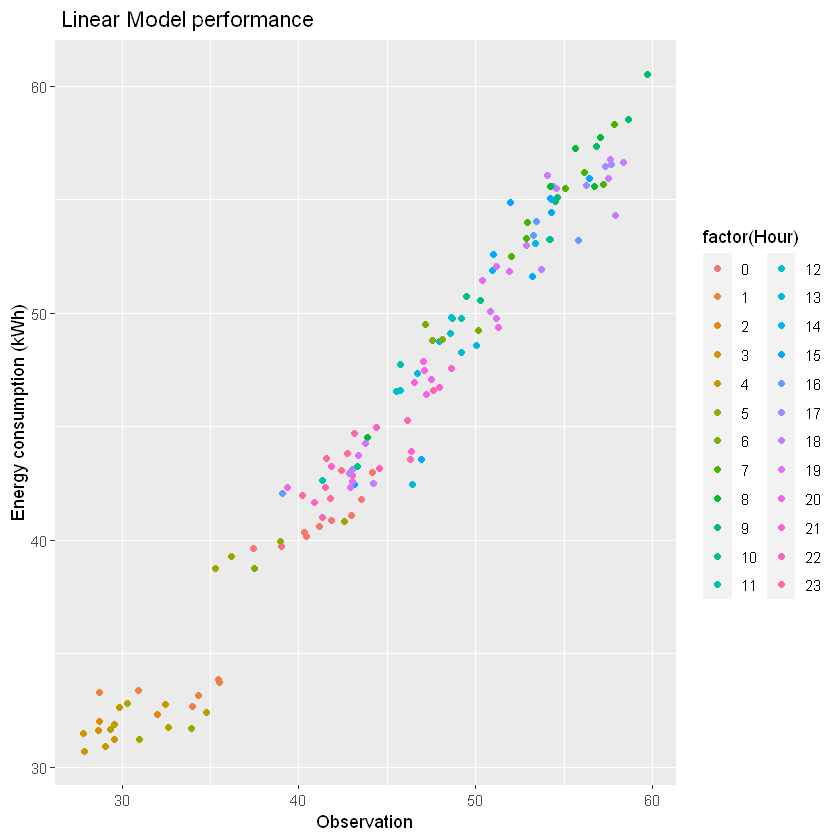

In [17]:
ggplot(test_compare) + 
 geom_point(aes(x=Observed.Response, y=X.Model1,color=factor(Hour))) +
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Observation")